<a href="https://colab.research.google.com/github/Sujan-Sawant/Confidence-Interval-and-CLT-Walmart_Case_Study/blob/main/Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#1E90FF">Business Case: Walmart - Confidence Interval and CLT</font>




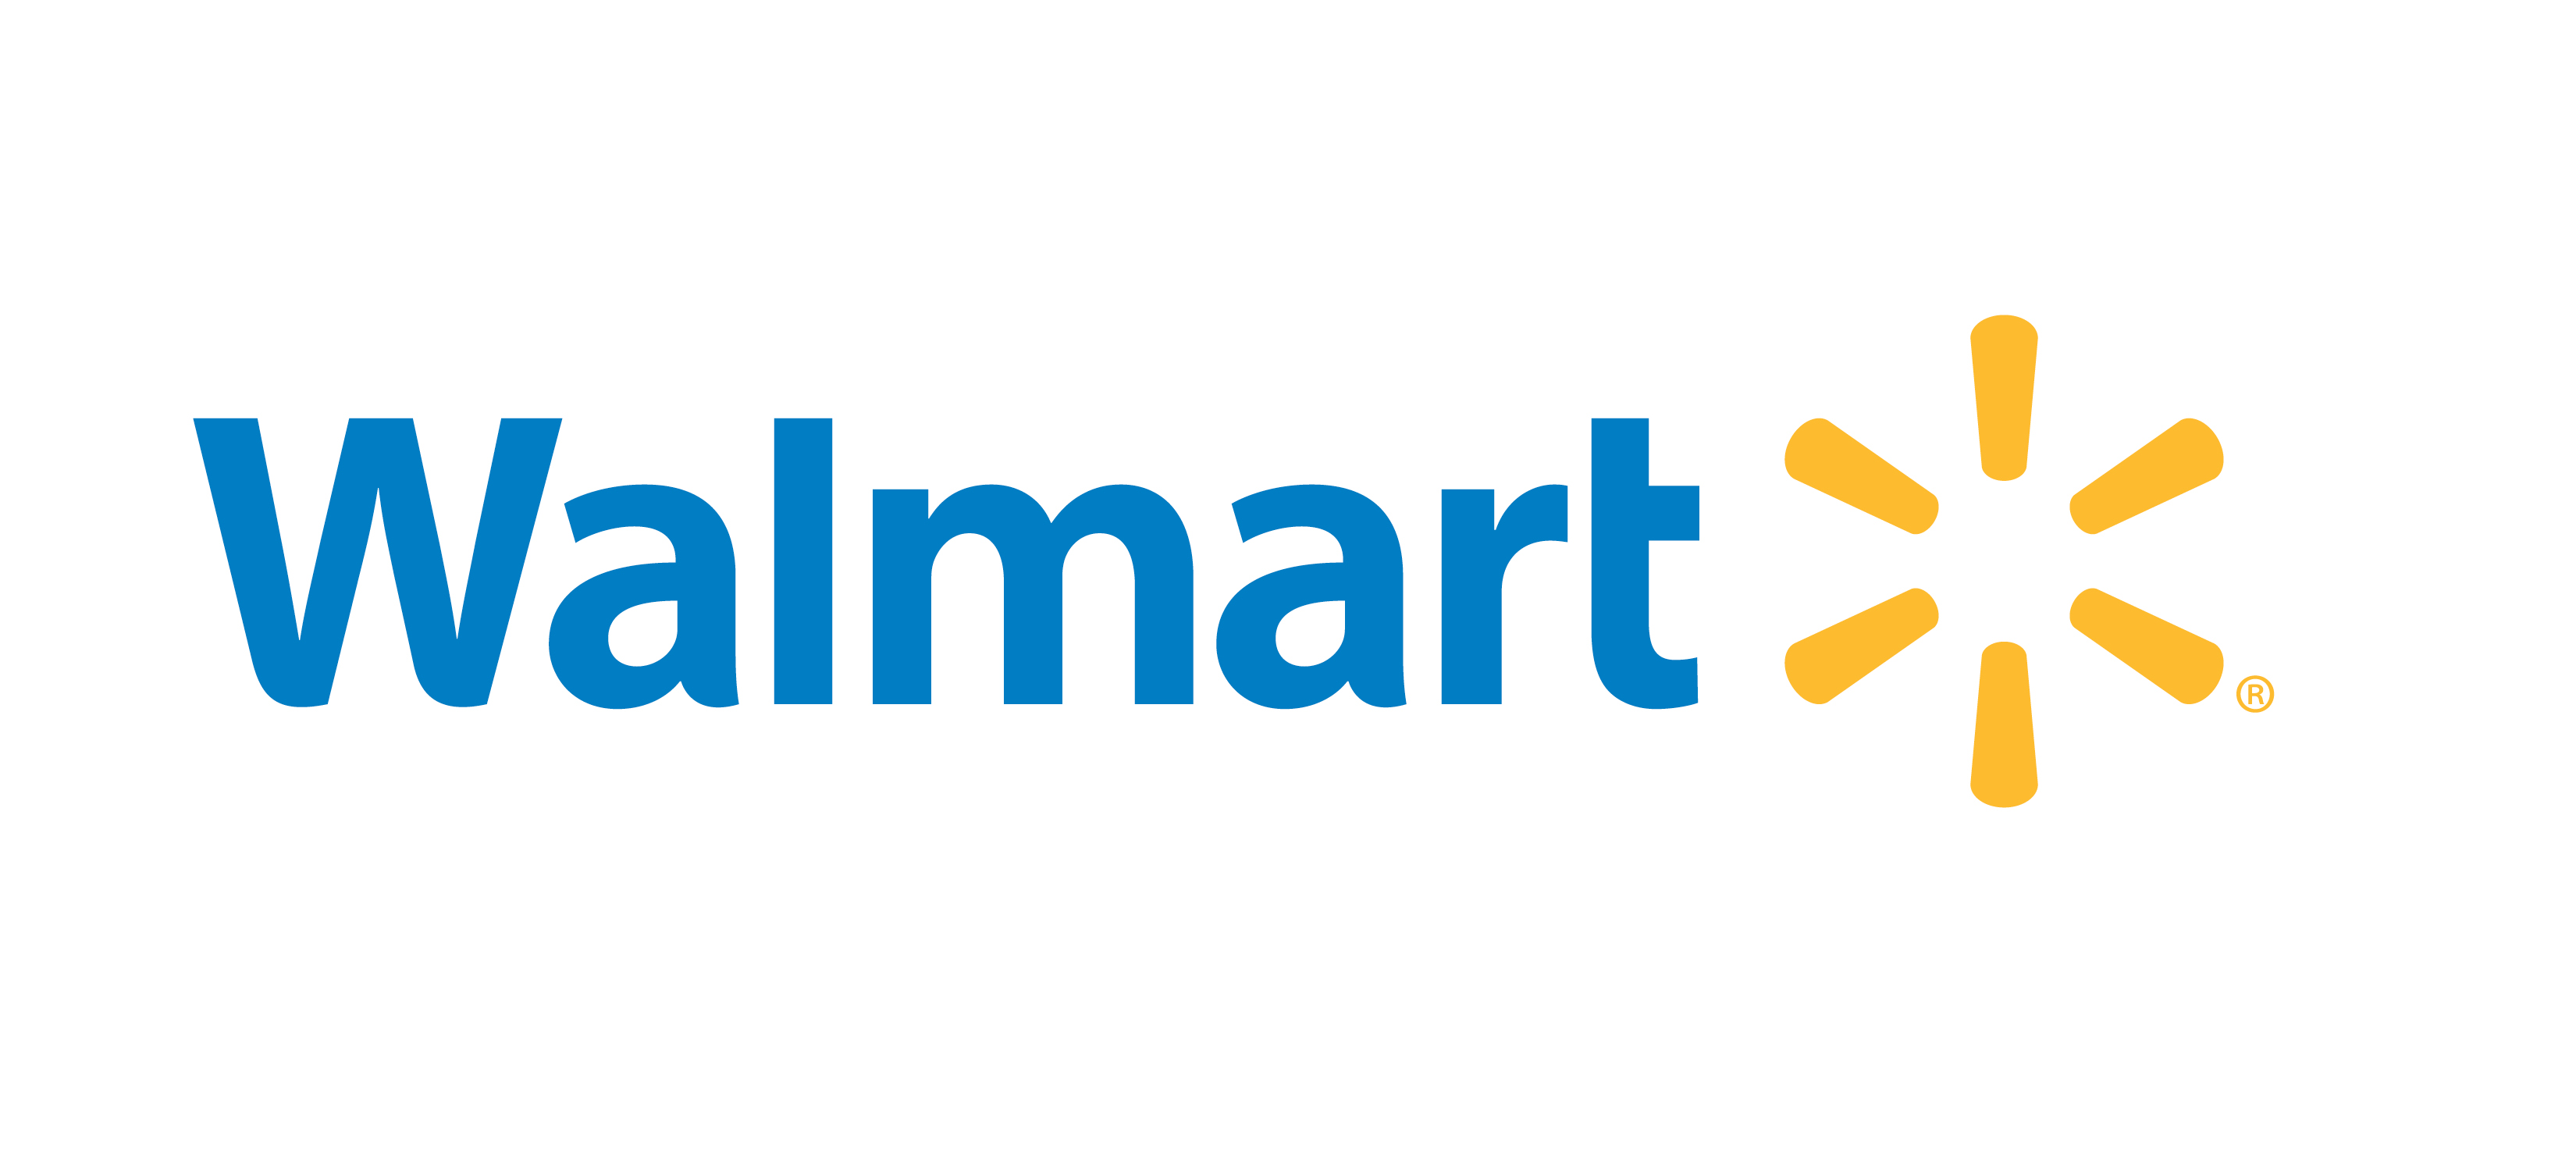

# About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# Business Problem


1.   The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
2.   They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- **User_ID**:	User ID
- **Product_ID**:	Product ID
- **Gender**:	Sex of User
- **Age**:	Age in bins
- **Occupation**:	Occupation(Masked)
- **City_Category**:	Category of the City (A,B,C)
- **StayInCurrentCityYears**:	Number of years stay in current city
- **Marital_Status**:	Marital Status
- **ProductCategory**:	Product Category (Masked)
- **Purchase**:	Purchase Amount

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# Downloding the data
!gdown 1UrnIaBumfLMkuvBYF9qyjEWJ_8WF9M3p

Downloading...
From: https://drive.google.com/uc?id=1UrnIaBumfLMkuvBYF9qyjEWJ_8WF9M3p
To: /content/walmart_data.txt
100% 23.0M/23.0M [00:00<00:00, 125MB/s] 


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/walmart_data.txt")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape

(550068, 10)

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
# Retrive the overview of a DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Display the data type of each column in a DataFrame
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


## Checking for Outliers

1: Occupation

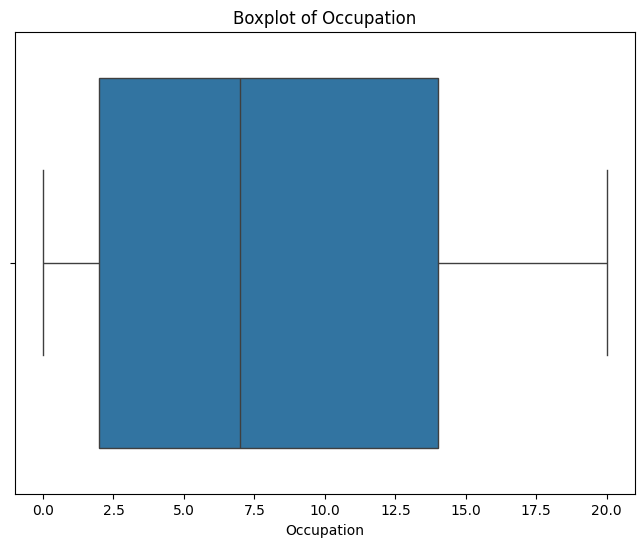

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x =df["Occupation"])
plt.title("Boxplot of Occupation")
plt.show()

No outlier present in the occupation.

## Checking for Outliers

2: Product Category

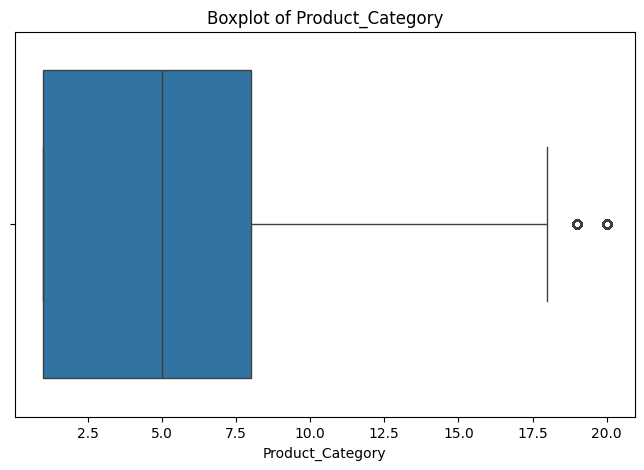

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Product_Category"])
plt.title("Boxplot of Product_Category")
plt.show()

## Detecting Outlier values using **Interquartile Range (IQR)** Method

In [ ]:
Q1 = df["Product_Category"].quantile(0.25)
Q3 = df["Product_Category"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Product_Category"] < left_most) | (df["Product_Category"] > right_most)]["Product_Category"]

print("Outlier Product_Category:", set(outliers.tolist()))

Left boundary: -9.5
Right boundary: 18.5
Outlier Product_Category: {19, 20}


## Checking for Outliers

3: Purchase

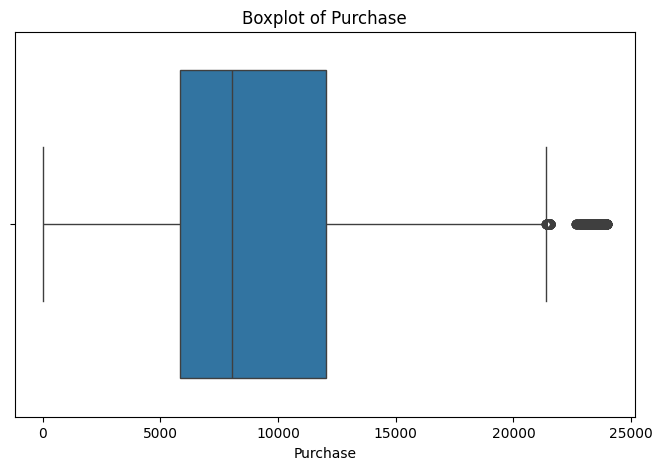

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

## Detecting Outlier values using **Interquartile Range (IQR)** Method

In [ ]:
Q1 = df["Purchase"].quantile(0.25)
Q3 = df["Purchase"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Purchase"] < left_most) | (df["Purchase"] > right_most)]["Purchase"]

print("Outlier Purchase:", set(outliers.tolist()))
print(f"Total_Outliers:", len(set(outliers.tolist())))

Left boundary: -3523.5
Right boundary: 21400.5
Outlier Purchase: {23610, 23612, 23624, 23856, 23630, 22651, 22656, 22666, 22668, 22678, 22684, 22710, 22719, 22730, 22743, 23724, 22791, 22795, 22803, 23485, 22814, 22816, 22823, 22846, 22848, 22852, 22855, 22858, 22864, 22871, 21425, 22902, 22913, 22919, 22942, 22946, 22963, 22976, 22984, 22989, 22990, 22994, 21429, 23006, 23482, 23029, 23040, 23041, 23042, 23043, 23044, 23045, 23046, 23047, 23048, 23049, 23050, 23051, 23052, 23053, 23054, 23055, 23056, 23057, 23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068, 23069, 23070, 23071, 23072, 23073, 23074, 23075, 23076, 23077, 23466, 23080, 23081, 23082, 23083, 23084, 23085, 23086, 23087, 23088, 23089, 23090, 23091, 23092, 23094, 23095, 23096, 23097, 23098, 23099, 23101, 23102, 23103, 23104, 23105, 23106, 23107, 23108, 23109, 23110, 23111, 23112, 23113, 23114, 23115, 23116, 23117, 23118, 23119, 23120, 23121, 23122, 23123, 23124, 23125, 23126, 23127, 23128, 23129, 231

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


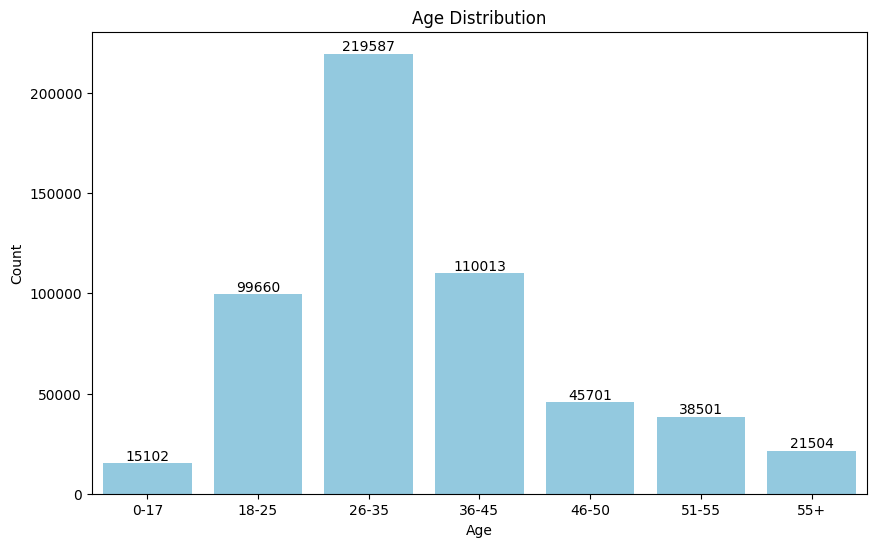

In [ ]:
age_counts = df["Age"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(age_counts,color="skyblue")
for val in ax.containers:
  ax.bar_label(val)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


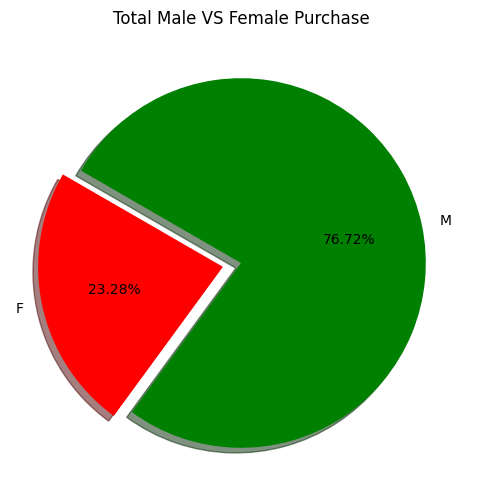

In [ ]:
Total_Purchase_by_gender = df.groupby("Gender")["Purchase"].sum()
print(Total_Purchase_by_gender)

explode = (0.1,0)
colors = ["red","green"]

plt.figure(figsize=(6,6))
plt.pie(Total_Purchase_by_gender, explode = explode,labels = Total_Purchase_by_gender.index,
        colors = colors,autopct='%1.2f%%', shadow=True, startangle=150)
plt.title("Total Male VS Female Purchase")
plt.show()

## Gender VS Purchase

In [ ]:
Female_data = df[df['Gender'] == 'F']
Male_data = df[df['Gender'] == 'M']

Average_Female_Purchase = Female_data['Purchase'].mean()
Average_Male_Purchase = Male_data['Purchase'].mean()

print(f"Average Female Purchase: {Average_Female_Purchase}")
print(f"Average Female Purchase: {Average_Male_Purchase}")

Average Female Purchase: 8734.565765155476
Average Female Purchase: 9437.526040472265


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


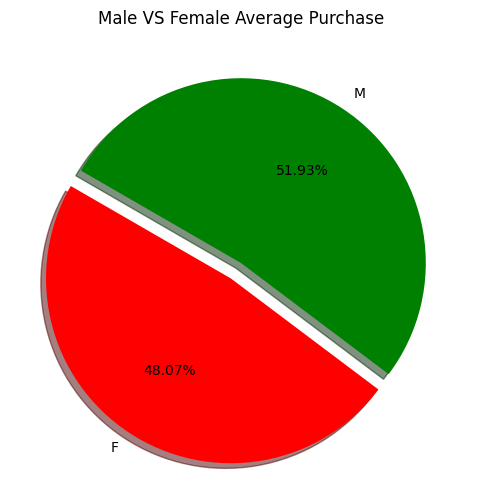

In [ ]:
mean_purchase_by_gender = df.groupby("Gender")["Purchase"].mean()
print(mean_purchase_by_gender)

explode = (0.1,0)
colors = ["red","green"]

plt.figure(figsize=(6,6))
plt.pie(mean_purchase_by_gender, explode = explode,labels = mean_purchase_by_gender.index,
        colors = colors,autopct='%1.2f%%', shadow=True, startangle=150)
plt.title("Male VS Female Average Purchase")
plt.show()

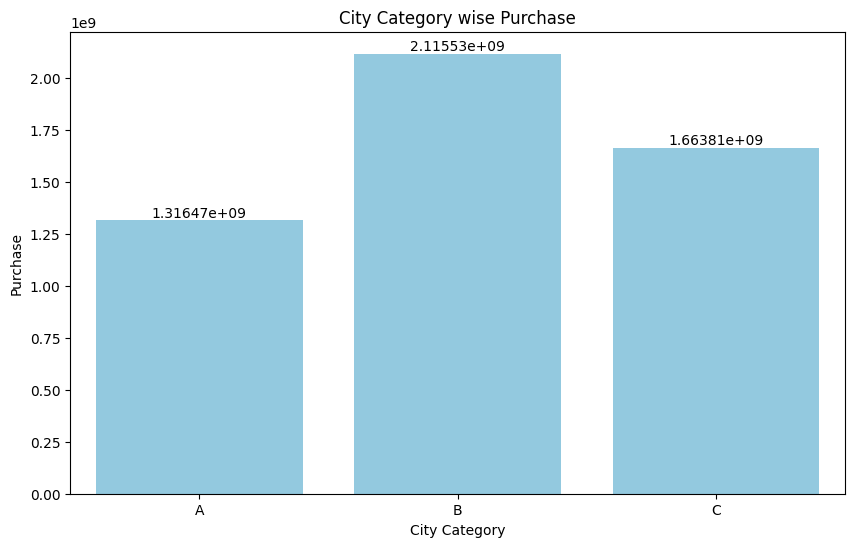

In [ ]:
City_Category_Purchase = df.groupby("City_Category")["Purchase"].sum()
# ax = sns.barplot(City_Category_Purchase)
# for val in ax.containers:
#   ax.bar_label(val)



plt.figure(figsize=(10, 6))
ax = sns.barplot(City_Category_Purchase,color="skyblue")
for val in ax.containers:
  ax.bar_label(val)
plt.title("City Category wise Purchase")
plt.xlabel("City Category")
plt.ylabel("Purchase")
plt.show()

  City_Category Gender    Purchase
0             A      F   306329915
1             A      M  1010141746
2             B      F   493617008
3             B      M  1621916597
4             C      F   386285719
5             C      M  1277521757


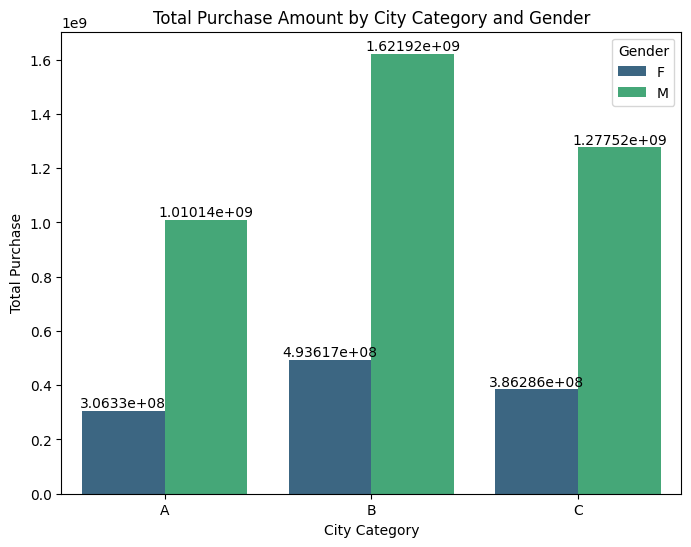

In [ ]:
purchase_by_city_gender = df.groupby(["City_Category", "Gender"])["Purchase"].sum().reset_index()
print(purchase_by_city_gender)

# Plot using seaborn's barplot
plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x="City_Category", y="Purchase", hue="Gender", data=purchase_by_city_gender, palette="viridis")

# Add labels to the bars
for val in ax1.containers:
    ax1.bar_label(val)

plt.title("Total Purchase Amount by City Category and Gender")
plt.xlabel("City Category")
plt.ylabel("Total Purchase")
plt.show()

In [ ]:
Product_Category_purchase = df.groupby("Product_Category")["Purchase"].sum().reset_index()
print(Product_Category_purchase)

    Product_Category    Purchase
0                  1  1910013754
1                  2   268516186
2                  3   204084713
3                  4    27380488
4                  5   941835229
5                  6   324150302
6                  7    60896731
7                  8   854318799
8                  9     6370324
9                 10   100837301
10                11   113791115
11                12     5331844
12                13     4008601
13                14    20014696
14                15    92969042
15                16   145120612
16                17     5878699
17                18     9290201
18                19       59378
19                20      944727


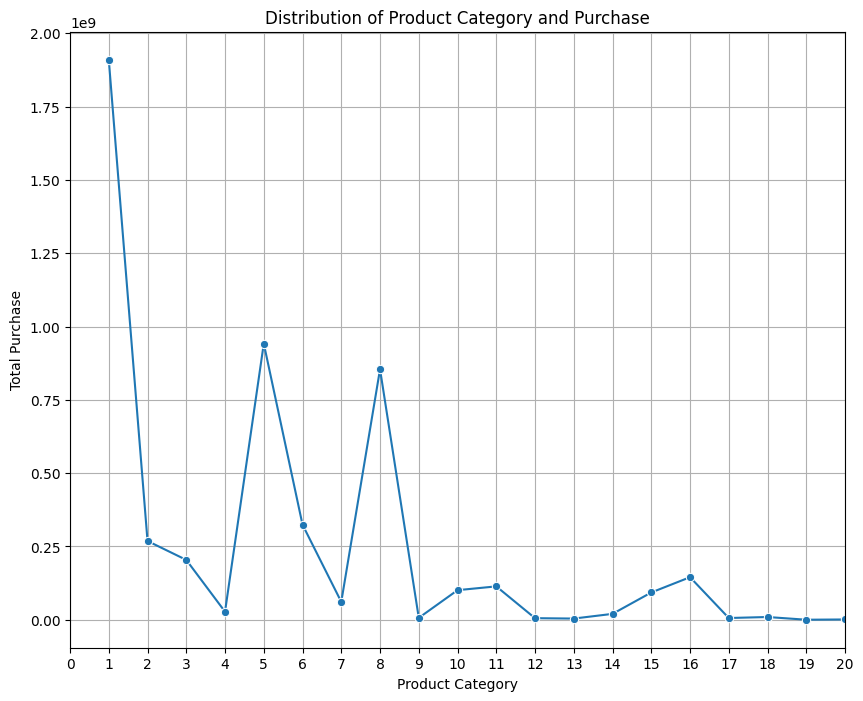

In [ ]:
plt.figure(figsize=(10,8))

sns.lineplot(x = "Product_Category" , y = "Purchase", data = Product_Category_purchase, marker="o", linestyle="-")

plt.xlim(0, 20)
plt.xticks(ticks=range(0, 21, 1))

plt.title("Distribution of Product Category and Purchase")
plt.xlabel("Product Category")
plt.ylabel("Total Purchase")
plt.grid(True)
plt.show()

In [ ]:
purchase_by_gender = df.groupby("Gender")["Purchase"].mean()
df["Gender"].value_counts()
purchase_by_gender


,Purchase
Gender,
F,8734.565765
M,9437.526040


### Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
With 90 % Confidence Levels

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]

# Calculate sample statistics for female customers
mean_female = female_data["Purchase"].mean()
std_female = female_data["Purchase"].std()
n_female = female_data["Purchase"].count()

# Calculate sample statistics for male customers
mean_male = male_data["Purchase"].mean()
std_male = male_data["Purchase"].std()
n_male = male_data["Purchase"].count()

# 90% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.90):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

# Compute confidence intervals for female customers
ci_female = confidence_interval(mean_female, std_female, n_female)

# Compute confidence intervals for male customers
ci_male = confidence_interval(mean_male, std_male, n_male)

print(f"Average amount spent per transaction by female customers: {mean_female:.2f}")
print(f"90% Confidence Interval for female customers: {ci_female}\n")

print(f"Average amount spent per transaction by male customers: {mean_male:.2f}")
print(f"90% Confidence Interval for male customers: {ci_male}")



Average amount spent per transaction by female customers: 8734.57
90% Confidence Interval for female customers: (8713.29, 8755.84)

Average amount spent per transaction by male customers: 9437.53
90% Confidence Interval for male customers: (9424.51, 9450.54)


### Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
With 95 % Confidence Levels

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]

# Calculate sample statistics for female customers
mean_female = female_data["Purchase"].mean()
std_female = female_data["Purchase"].std()
n_female = female_data["Purchase"].count()

# Calculate sample statistics for male customers
mean_male = male_data["Purchase"].mean()
std_male = male_data["Purchase"].std()
n_male = male_data["Purchase"].count()

# 95% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.95):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

# Compute confidence intervals for female customers
ci_female = confidence_interval(mean_female, std_female, n_female)

# Compute confidence intervals for male customers
ci_male = confidence_interval(mean_male, std_male, n_male)

print(f"Average amount spent per transaction by female customers: {mean_female:.2f}")
print(f"95% Confidence Interval for female customers: {ci_female}\n")

print(f"Average amount spent per transaction by male customers: {mean_male:.2f}")
print(f"95% Confidence Interval for male customers: {ci_male}")



Average amount spent per transaction by female customers: 8734.57
95% Confidence Interval for female customers: (8709.21, 8759.92)

Average amount spent per transaction by male customers: 9437.53
95% Confidence Interval for male customers: (9422.02, 9453.03)


### Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
With 99 % Confidence Levels

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]

# Calculate sample statistics for female customers
mean_female = female_data["Purchase"].mean()
std_female = female_data["Purchase"].std()
n_female = female_data["Purchase"].count()

# Calculate sample statistics for male customers
mean_male = male_data["Purchase"].mean()
std_male = male_data["Purchase"].std()
n_male = male_data["Purchase"].count()

# 99% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.99):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

# Compute confidence intervals for female customers
ci_female = confidence_interval(mean_female, std_female, n_female)

# Compute confidence intervals for male customers
ci_male = confidence_interval(mean_male, std_male, n_male)

print(f"Average amount spent per transaction by female customers: {mean_female:.2f}")
print(f"99% Confidence Interval for female customers: {ci_female}\n")

print(f"Average amount spent per transaction by male customers: {mean_male:.2f}")
print(f"99% Confidence Interval for male customers: {ci_male}")

Average amount spent per transaction by female customers: 8734.57
99% Confidence Interval for female customers: (8701.24, 8767.89)

Average amount spent per transaction by male customers: 9437.53
99% Confidence Interval for male customers: (9417.15, 9457.91)


# Inferences


1.   Average Spending Difference:

- Female customers have an average transaction amount of 8734.57.
- Male customers have an average transaction amount of 9437.53.
- There is a noticeable difference in average spending between male and female customers, with male customers spending more on average.
2.   Confidence Intervals:

- Female Customers: The 99%,95%,90% Confidence Intervals are (8701.24, 8767.89),(8709.21, 8759.92),(8713.29, 8755.84).
- This means we are 99%,95% and 90% confident that the true average amount spent per transaction by female customers falls within this range.
- Male Customers: The 99%,95%,90% Confidence Intervals are (9417.15, 9457.91),(9422.02, 9453.03),(9424.51, 9450.54).
- Similarly, we are 99%,95% and 90% confident that the true average amount spent per transaction by male customers falls within this range.

3. Recommendations:

- For Female Customers: Since the average spending per transaction is lower, consider developing targeted marketing strategies to encourage higher spending. This could include offering discounts on higher-value items, loyalty programs, or promotions that incentivize larger purchases.
- For Male Customers: Since male customers spend more on average, tailor marketing strategies that promote high-value or premium products. Consider loyalty programs or exclusive offers that appeal to their higher spending behavior.
- Develope campaigns that target specific spending behaviors. For example, during special sales or festive periods, create discounts that could encourage higher spending for both genders.


## explain how the distribution of sample means for female and male customers' purchase amounts is visualized. What can you infer from the histograms about the average spending behavior of male and female customers?

### for Sample size 50 and number of samples 1000

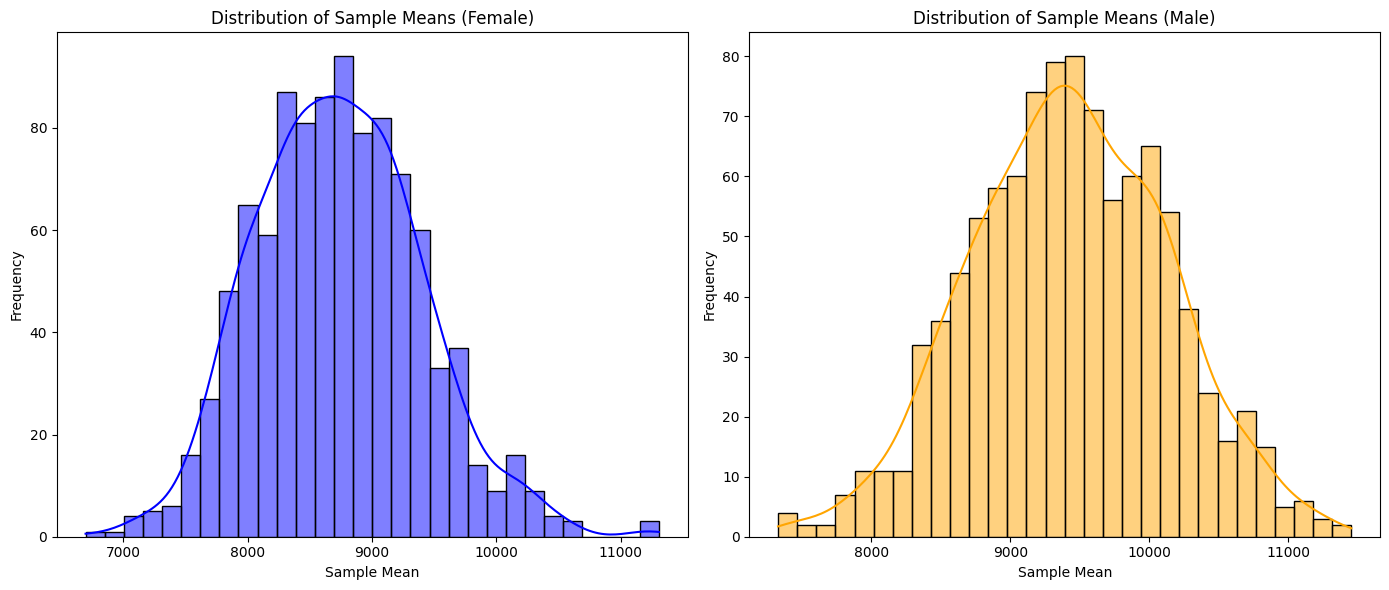

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]


sample_size = 50  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for female customers
sample_means_female = [np.mean(np.random.choice(female_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Random sampling for male customers
sample_means_male = [np.mean(np.random.choice(male_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for female customers
plt.subplot(1, 2, 1)
sns.histplot(sample_means_female, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Female)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for male customers
plt.subplot(1, 2, 2)
sns.histplot(sample_means_male, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Male)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### for Sample size 100 and number of samples 1000

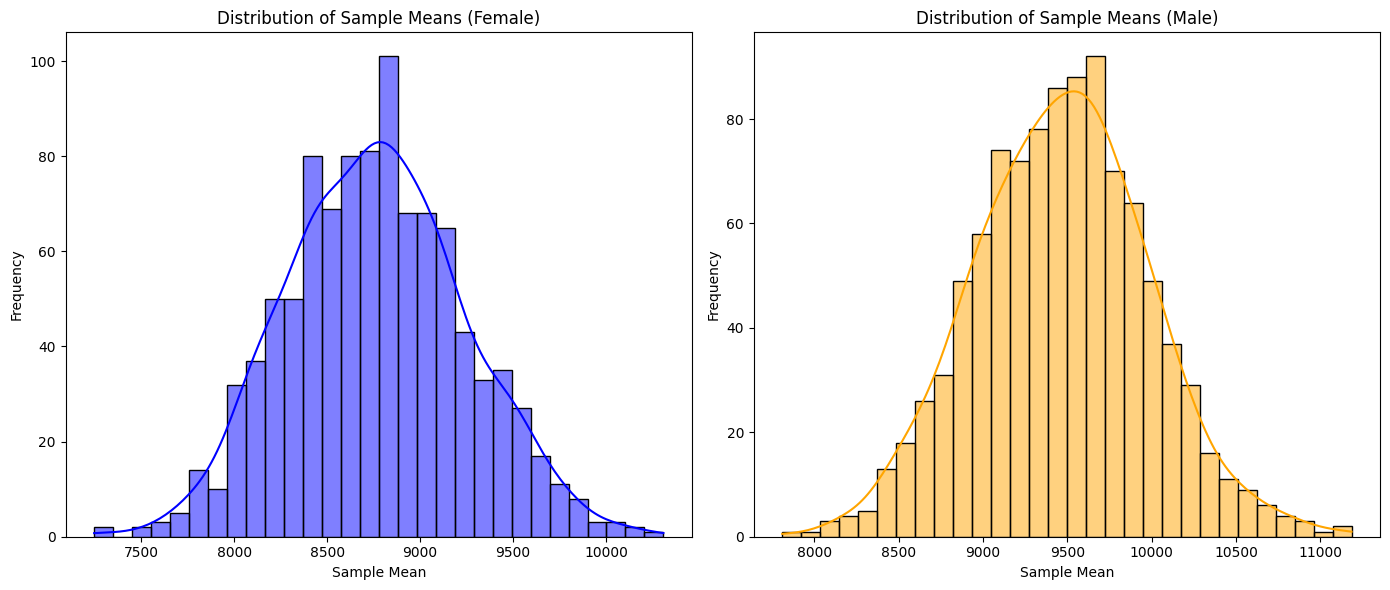

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]


sample_size = 100  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for female customers
sample_means_female = [np.mean(np.random.choice(female_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Random sampling for male customers
sample_means_male = [np.mean(np.random.choice(male_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for female customers
plt.subplot(1, 2, 1)
sns.histplot(sample_means_female, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Female)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for male customers
plt.subplot(1, 2, 2)
sns.histplot(sample_means_male, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Male)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### for Sample size 200 and number of samples 1000

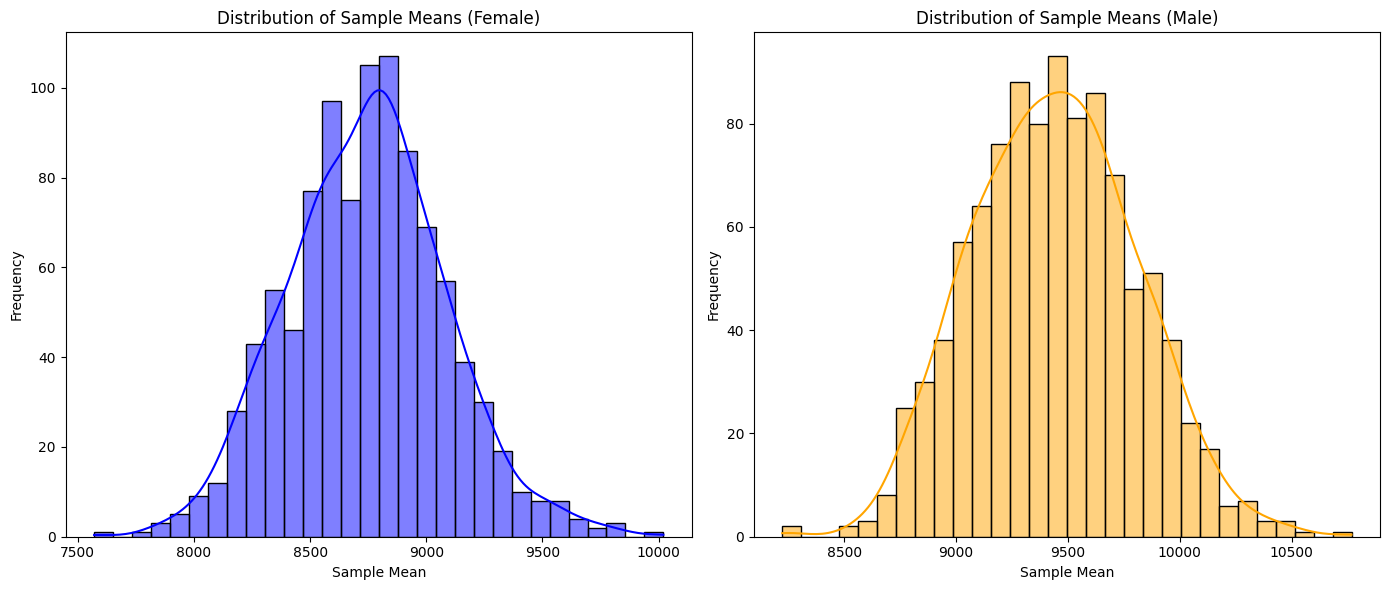

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]


sample_size = 200  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for female customers
sample_means_female = [np.mean(np.random.choice(female_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Random sampling for male customers
sample_means_male = [np.mean(np.random.choice(male_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for female customers
plt.subplot(1, 2, 1)
sns.histplot(sample_means_female, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Female)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for male customers
plt.subplot(1, 2, 2)
sns.histplot(sample_means_male, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Male)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### for Sample size 500 and number of samples 1200

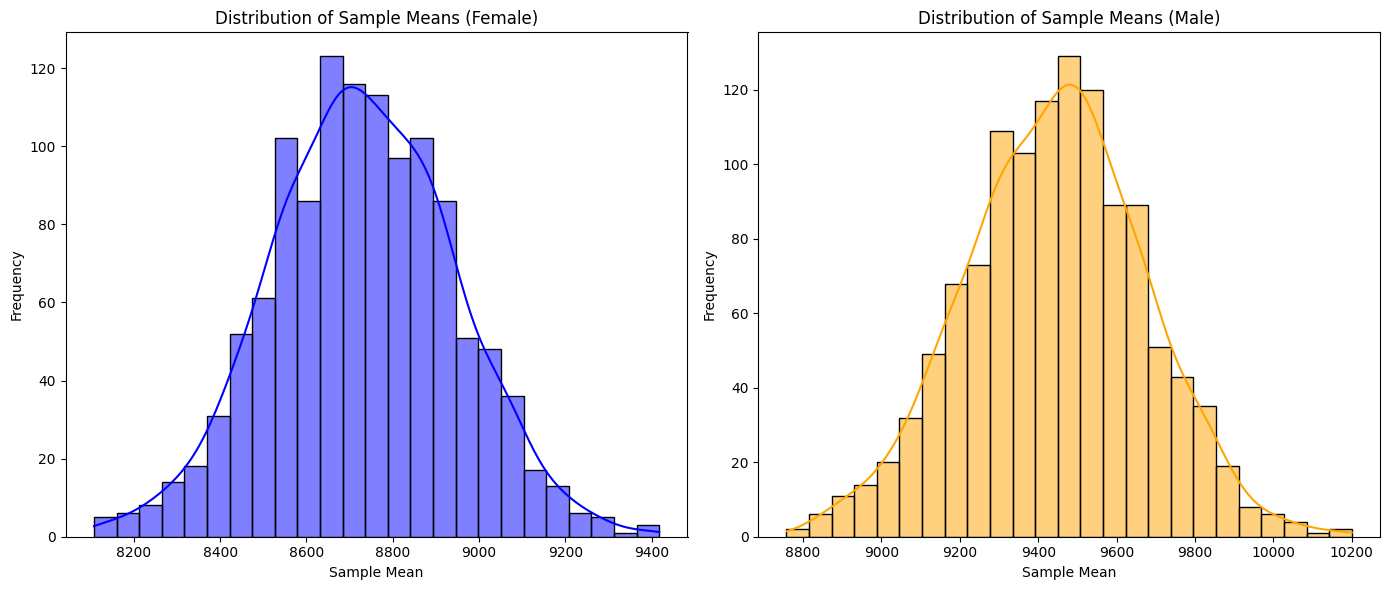

In [ ]:
# Filter data by gender
female_data = df[df["Gender"] == "F"]
male_data = df[df["Gender"] == "M"]


sample_size = 500  # Size of each sample
num_samples = 1200  # Number of samples to draw

# Random sampling for female customers
sample_means_female = [np.mean(np.random.choice(female_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Random sampling for male customers
sample_means_male = [np.mean(np.random.choice(male_data["Purchase"], size=sample_size, replace=False)) for _ in range(num_samples)]

# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for female customers
plt.subplot(1, 2, 1)
sns.histplot(sample_means_female, bins=25, kde=True, color="blue")
plt.title("Distribution of Sample Means (Female)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for male customers
plt.subplot(1, 2, 2)
sns.histplot(sample_means_male, bins=25, kde=True, color="orange")
plt.title("Distribution of Sample Means (Male)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### To make this more justified lets make hypothesis test to determine if there is a significant difference between the average spending of the two groups.
###we will use two-sample t-test (also known as the independent t-test).

Setting the Hypothesis:

**Null Hypothesis (H₀):** There is no significant difference in the average spending between male and female customers. (mu1 = mu2)

**Alternative Hypothesis (H₁):** There is a significant difference in the average spending between male and female customers. (mu1 ≠ mu2)

In [ ]:
from scipy import stats

# Filter data by Gender
female = df[df["Gender"]=="F"]
male = df[df["Gender"]=="M"]

# Take random sample for female purchase
female_data = np.random.choice(female["Purchase"],size = 500)
mean_female = np.mean(female_data)

# Take random sample for male purchase
male_data = np.random.choice(male["Purchase"],size = 500)
mean_male = np.mean(male_data)


# Computiong Statistic and p value
t_statistic, p_value = stats.ttest_ind(female_data, male_data,equal_var=False)


print(f"Mean Spending (Female): {mean_female:.2f}")
print(f"Mean Spending (Male): {mean_male:.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"p-Value: {p_value:.4f}")

# Lets assume 99% Confidence interval
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in average spending between male and female customers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in average spending between male and female customers.")

Mean Spending (Female): 9248.92
Mean Spending (Male): 9486.73
t-Statistic: -0.74
p-Value: 0.4582
Fail to reject the null hypothesis.
There is no significant difference in average spending between male and female customers.


**For testing 4 diffrent sample size we have conclusion that:**

1. Central Limit Theorem Validation:

- **Normal Distribution:** The Sample means are normally distributed reinforces the Central Limit Theorem (CLT). The CLT states that the distribution of sample means will approach a normal distribution as the sample size increases, regardless of the shape of the population distribution, provided the sample size is sufficiently large.
- The central point of each normal distribution (the peak) represents the average spending for each gender. By comparing the means of these distributions, you can infer the relative spending behavior of male versus female customers.

2. **Recommendations:**
- From above graph we can design marketing campaigns.For example,

 *   The mean spending for males is higher, consider creating premium offers for them.

 *   For females, you might explore strategies to increase average spending like discounts,offers,etc.
 *    since male spends more we can have high value products for them.

 *   for female we can have value for money products.

 *   optimize inventory Stock more high-value items as they are popular among male customers, and adjust the product mix for female customers based on their spending behavior.






In [ ]:
df.groupby("Gender")["Purchase"].agg(["mean","std","count"])

,mean,std,count
Gender,,,
F,8734.565765,4767.233289,135809
M,9437.526040,5092.186210,414259


### Q: Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

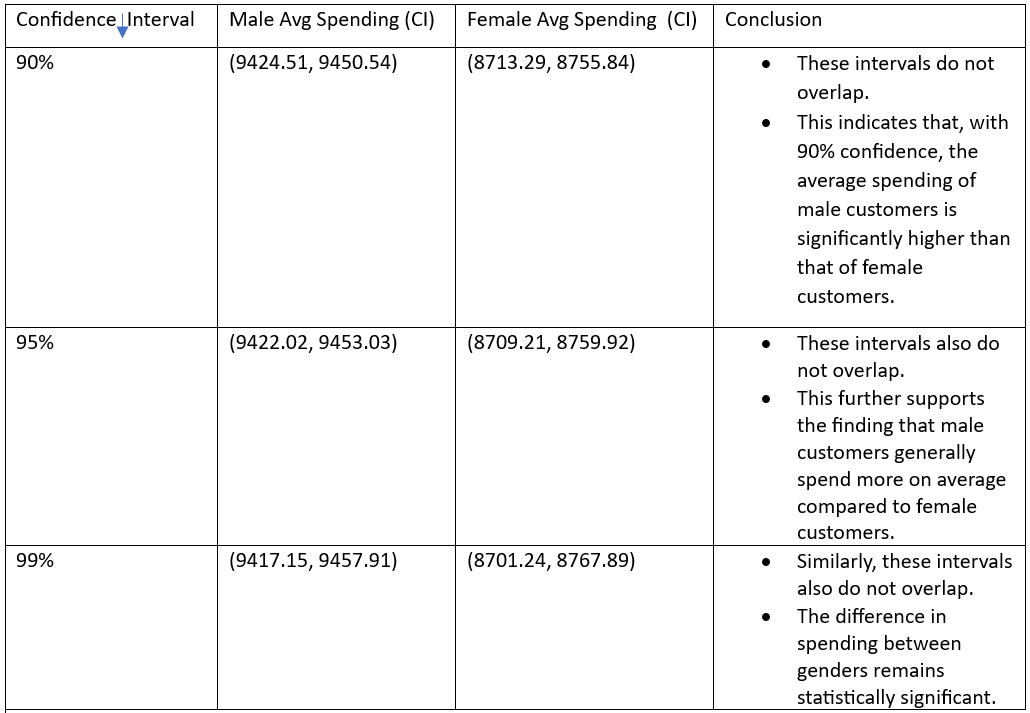



1.   **Conclusion:**
   *  The above table indicates that,the confidence intervals for the average spending of male and female customers do not overlap at any confidence level i.e (99%, 95%, and 90%).
   
  *   This consistent non-overlap indicates that there is a statistically significant difference in average spending between male and female customers. Males spend more on average than females.


2.   **Recommendations:**
  *   Run some offers, some progarammes like try products for free etc to attract customers specially for women customers as they have less spending.
  *   Develop loyalty programs with rewards,discounts,return gifts specially for women customers as they have less spending.

  *    Create  advertising campaigns focusing on products and promotions that align with the spending habits of each gender.
  *   Use various channels (social media, email, in-store) to deliver personalized messages like notifications.
  *   Use customer feedback to continuously improve the shopping experience and resolve the gaps.
  *   Optimize the e-commerce platform for a better user experience, including personalized product recommendations and promotions.

  *   Run marketing strategies to local preferences and cultural differences for diffrent regions.
  *   Conduct A/B testing for different marketing strategies, promotions, and product placements to identify the most effective approaches for each gender.






--------------------------------------------------------------------------------------------------------------

# Marital_Status Vs Purchase

In [ ]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [ ]:
df.groupby("Marital_Status")["Purchase"].agg(["mean","count"])


,mean,count
Marital_Status,,
0,9265.907619,324731
1,9261.174574,225337


<ipython-input-111-f77442944b7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = average_purchase.index,y = average_purchase.values,palette=["skyblue", "salmon"])


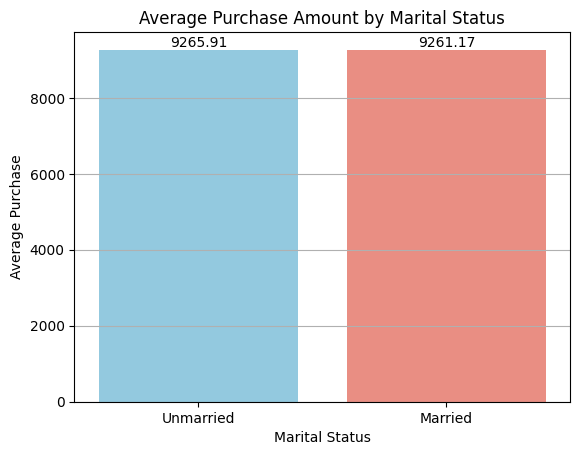

In [ ]:
# Calculate average purchase amount by marital status
average_purchase = df.groupby("Marital_Status")["Purchase"].mean()



ax = sns.barplot(x = average_purchase.index,y = average_purchase.values,palette=["skyblue", "salmon"])
for val in ax.containers:
  ax.bar_label(val)

plt.title("Average Purchase Amount by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Purchase")
plt.xticks(ticks=[0, 1], labels=["Unmarried", "Married"], rotation=0)
plt.grid(axis="y")
plt.show()


<ipython-input-112-45d5b74ab388>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Marital_Status", y="Purchase", data=df,palette=["skyblue","salmon"])


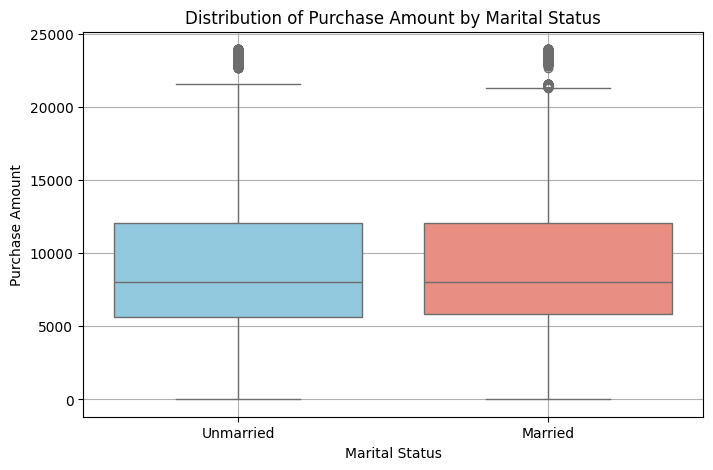

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Marital_Status", y="Purchase", data=df,palette=["skyblue","salmon"])
plt.title("Distribution of Purchase Amount by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Purchase Amount")
plt.xticks([0, 1], ["Unmarried", "Married"])
plt.grid(True)
plt.show()

## Detecting outliers for Unmarried Purchase.

In [ ]:
Umarried_Purchase = df[df["Marital_Status"]==0]["Purchase"]
Q1 = Umarried_Purchase.quantile(0.25)
Q3 = Umarried_Purchase.quantile(0.75)

IQR = Q3-Q1

# Set k = 1.5
k=1.5

left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

outlier = Umarried_Purchase[(Umarried_Purchase < left_most) | (Umarried_Purchase > right_most)]
print(set(outlier.tolist()))
print(len(outlier))



{22656, 22666, 22668, 22678, 22684, 22710, 22719, 22730, 22743, 22791, 22795, 22803, 22816, 22846, 22855, 22864, 22871, 22902, 22919, 22942, 22946, 22976, 22984, 22989, 22994, 23006, 23029, 23042, 23043, 23044, 23047, 23048, 23049, 23050, 23052, 23053, 23055, 23056, 23057, 23059, 23060, 23061, 23063, 23066, 23068, 23069, 23070, 23071, 23072, 23073, 23075, 23076, 23077, 23080, 23081, 23082, 23083, 23084, 23085, 23087, 23088, 23089, 23090, 23092, 23095, 23096, 23097, 23098, 23099, 23101, 23103, 23104, 23105, 23106, 23107, 23109, 23111, 23112, 23113, 23114, 23116, 23117, 23118, 23119, 23120, 23121, 23123, 23124, 23125, 23126, 23127, 23128, 23129, 23130, 23133, 23136, 23137, 23138, 23139, 23140, 23141, 23142, 23143, 23144, 23146, 23148, 23150, 23151, 23153, 23154, 23155, 23156, 23157, 23158, 23159, 23160, 23161, 23163, 23164, 23165, 23166, 23167, 23168, 23169, 23171, 23172, 23174, 23175, 23176, 23178, 23179, 23180, 23181, 23182, 23184, 23190, 23192, 23193, 23195, 23196, 23197, 23200, 23201

## Detecting outliers for Married Purchase.

In [ ]:
Married_Purchase = df[df["Marital_Status"]==1]["Purchase"]
Q1 = Married_Purchase.quantile(0.25)
Q3 = Married_Purchase.quantile(0.75)

IQR = Q3-Q1

# Set k = 1.5
k=1.5

left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

outlier = Married_Purchase[(Married_Purchase < left_most) | (Married_Purchase > right_most)]
print(set(outlier.tolist()))
print(len(outlier))


{22651, 22814, 22823, 21341, 22848, 22852, 22858, 22902, 22913, 22963, 22990, 23029, 23040, 23041, 23042, 23045, 23046, 23047, 23048, 23049, 23050, 23051, 23054, 23055, 23058, 23060, 23062, 23063, 23064, 23065, 23067, 23069, 23070, 23071, 23072, 23073, 23074, 23075, 23076, 23080, 23081, 23082, 23083, 23085, 23086, 23087, 23089, 23090, 23091, 23092, 23094, 23095, 23096, 23097, 23098, 23099, 23101, 23102, 23103, 23104, 23105, 23108, 23109, 23110, 23112, 23113, 23115, 23117, 23119, 23120, 23121, 23122, 23123, 23125, 23126, 23127, 23129, 23130, 23131, 23132, 23138, 23140, 23141, 23142, 23143, 23144, 23145, 23147, 23149, 23151, 23152, 23153, 23154, 23155, 23156, 23158, 23159, 23160, 23161, 23162, 23167, 23168, 23169, 23170, 23171, 23172, 23174, 23175, 23176, 23177, 23178, 23180, 23181, 23183, 23184, 23185, 23186, 23187, 23188, 23189, 23192, 23193, 23199, 23201, 23203, 23205, 23391, 23207, 23208, 23209, 23212, 23214, 23215, 23218, 23219, 23220, 23222, 23223, 23224, 23225, 23226, 23227, 23233

## Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by Maritial Status.
with 90% Interval Level

In [ ]:
# Filter data by Maritial Status

Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]


# Calculate sample statistics for Married Customers.
mean_married = Married_data["Purchase"].mean()
std_married = Married_data["Purchase"].std()
n_married = Married_data["Purchase"].count()

# Calculate sample statistics for Unmarried Customers.
mean_Unmarried = Unmarried_data["Purchase"].mean()
std_Unmarried = Unmarried_data["Purchase"].std()
n_Unmarried = Unmarried_data["Purchase"].count()

# 90% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.90):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

# Compute confidence intervals for Married customers
ci_married = confidence_interval(mean_married, std_married, n_married)

# Compute confidence intervals for Unmarried customers
ci_unmarried = confidence_interval(mean_Unmarried, std_Unmarried, n_Unmarried)

print(f"Average amount spent per transaction by Married customers: {mean_married:.2f}")
print(f"90% Confidence Interval for Married customers: {ci_married}\n")

print(f"Average amount spent per transaction by Unmarried customers: {mean_Unmarried:.2f}")
print(f"90% Confidence Interval for Unmarried customers: {ci_unmarried}")

Average amount spent per transaction by Married customers: 9261.17
90% Confidence Interval for Married customers: (9243.79, 9278.56)

Average amount spent per transaction by Unmarried customers: 9265.91
90% Confidence Interval for Unmarried customers: (9251.4, 9280.42)


## Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by Maritial Status.
with 95% Interval Level

In [ ]:
# Filter data by Maritial Status

Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]


# Calculate sample statistics for Married Customers.
mean_married = Married_data["Purchase"].mean()
std_married = Married_data["Purchase"].std()
n_married = Married_data["Purchase"].count()

# Calculate sample statistics for Unmarried Customers.
mean_Unmarried = Unmarried_data["Purchase"].mean()
std_Unmarried = Unmarried_data["Purchase"].std()
n_Unmarried = Unmarried_data["Purchase"].count()

# 90% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.95):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

# Compute confidence intervals for Married customers
ci_married = confidence_interval(mean_married, std_married, n_married)

# Compute confidence intervals for Unmarried customers
ci_unmarried = confidence_interval(mean_Unmarried, std_Unmarried, n_Unmarried)

print(f"Average amount spent per transaction by Married customers: {mean_married:.2f}")
print(f"95% Confidence Interval for Married customers: {ci_married}\n")

print(f"Average amount spent per transaction by Unmarried customers: {mean_Unmarried:.2f}")
print(f"95% Confidence Interval for Unmarried customers: {ci_unmarried}")

Average amount spent per transaction by Married customers: 9261.17
95% Confidence Interval for Married customers: (9240.46, 9281.89)

Average amount spent per transaction by Unmarried customers: 9265.91
95% Confidence Interval for Unmarried customers: (9248.62, 9283.2)


## Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by Maritial Status.
with 99% Interval Level

In [ ]:
# Filter data by Maritial Status

Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]


# Calculate sample statistics for Married Customers.
mean_married = Married_data["Purchase"].mean()
std_married = Married_data["Purchase"].std()
n_married = Married_data["Purchase"].count()

# Calculate sample statistics for Unmarried Customers.
mean_Unmarried = Unmarried_data["Purchase"].mean()
std_Unmarried = Unmarried_data["Purchase"].std()
n_Unmarried = Unmarried_data["Purchase"].count()

# 90% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.99):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

# Compute confidence intervals for Married customers
ci_married = confidence_interval(mean_married, std_married, n_married)

# Compute confidence intervals for Unmarried customers
ci_unmarried = confidence_interval(mean_Unmarried, std_Unmarried, n_Unmarried)

print(f"Average amount spent per transaction by Married customers: {mean_married:.2f}")
print(f"99% Confidence Interval for Married customers: {ci_married}\n")

print(f"Average amount spent per transaction by Unmarried customers: {mean_Unmarried:.2f}")
print(f"99% Confidence Interval for Unmarried customers: {ci_unmarried}")

Average amount spent per transaction by Married customers: 9261.17
99% Confidence Interval for Married customers: (9233.95, 9288.4)

Average amount spent per transaction by Unmarried customers: 9265.91
99% Confidence Interval for Unmarried customers: (9243.18, 9288.63)


# Inferences


1.   Average Spending Difference:

- Married customers have an average transaction amount of 9261.17
- Unmarried customers have an average transaction amount of 9265.91.
- There is a not a significant difference in average spending between married and unmarried customers, with unmarried customers spends slightly more on average.
2.   Confidence Intervals:

- Married Customers: The 99%,95%,90% Confidence Intervals are (9233.95, 9288.4),(9240.46, 9281.89),(9243.79, 9278.56).
- This means we are 99%,95% and 90% confident that the true average amount spent per transaction by married customers falls within this range.
- Unmarried Customers: The 99%,95%,90% Confidence Intervals are (9243.18, 9288.63),(9248.62, 9283.2),(9251.4, 9280.42).
- Similarly, we are 99%,95% and 90% confident that the true average amount spent per transaction by unmarried customers falls within this range.

3. Recommendations:

- Since unmarried customers spend slightly more on average, you might want to develop marketing campaigns that highlight products or services that has intrest specifically to them.
- For Married Customers their average spending is slightly lower, married customers might have different needs or interests. Tailor promotions to items that could appeal to family-oriented or home-related products.
- For Unmarried customers Offer personalized promotions or discounts on products that typically attract younger or single individuals.
- For married customers Offer personalized promotions or discounts on products that are family-oriented,couple related.
- Conduct surveys to better understand the preferences and needs of both unmarried and married customers. Use this feedback to refine your marketing strategies and product offerings.


## explain how the distribution of sample means for Married and Unmarried customers' purchase amounts is visualized. What can you infer from the histograms about the average spending behavior of Married and Unmarried customers?

### for Sample size 50 and number of samples 1000

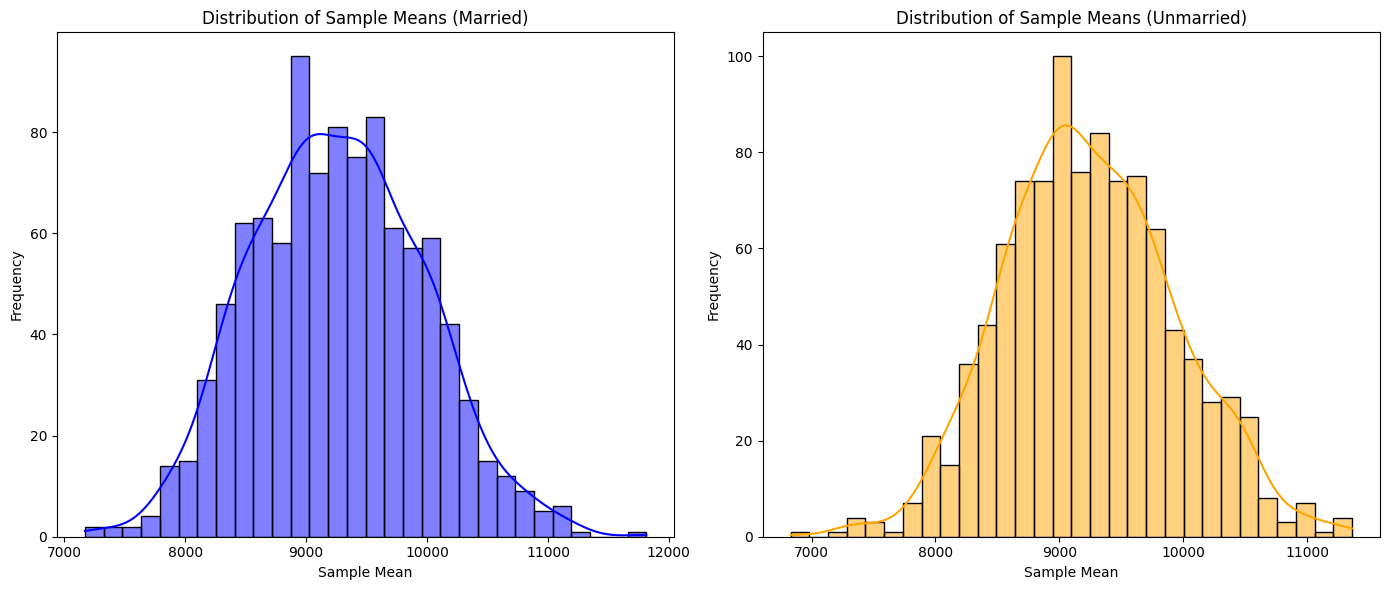

In [ ]:
# Filter data by Maritial Status
Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]

sample_size = 50  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for Married customers
married_sample_means = [np.mean(np.random.choice(Married_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]

# Random sampling for Unmarried customers
unmarried_sample_means = [np.mean(np.random.choice(Unmarried_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]



# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for Married customers
plt.subplot(1, 2, 1)
sns.histplot(married_sample_means, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Married)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for Unmarried customers
plt.subplot(1, 2, 2)
sns.histplot(unmarried_sample_means, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Unmarried)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




### for Sample size 100 and number of samples 1000

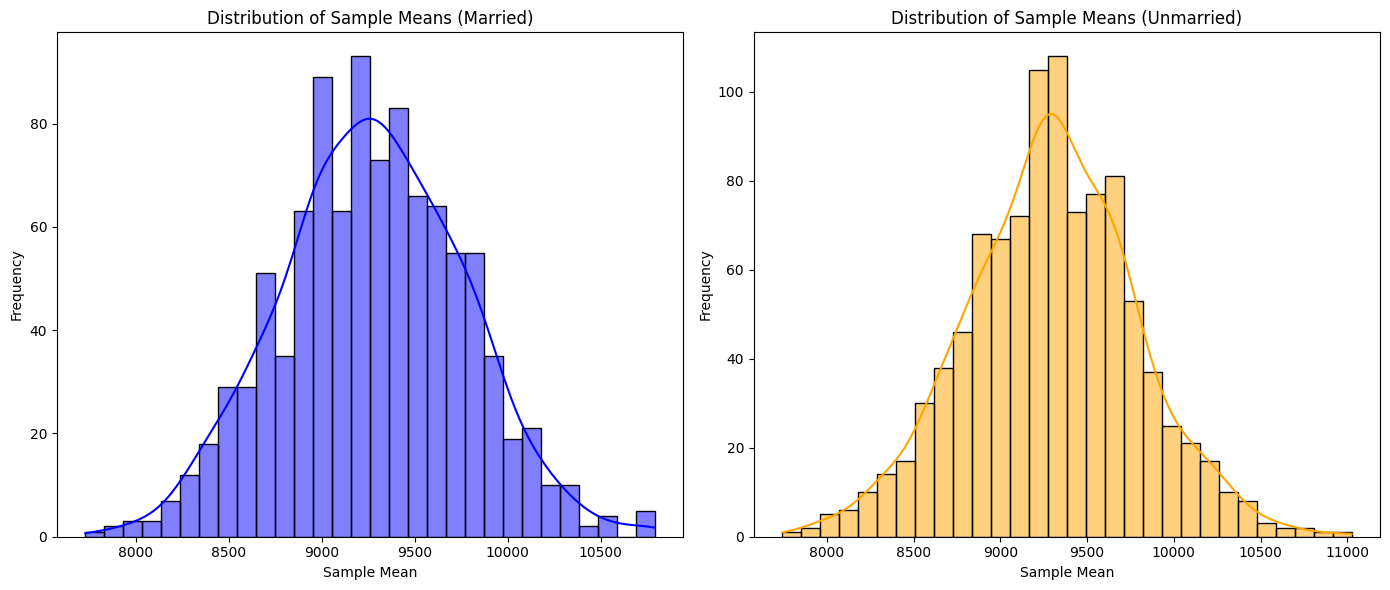

In [ ]:
# Filter data by Maritial Status
Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]

sample_size = 100  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for Married customers
married_sample_means = [np.mean(np.random.choice(Married_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]

# Random sampling for Unmarried customers
unmarried_sample_means = [np.mean(np.random.choice(Unmarried_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]



# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for Married customers
plt.subplot(1, 2, 1)
sns.histplot(married_sample_means, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Married)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for Unmarried customers
plt.subplot(1, 2, 2)
sns.histplot(unmarried_sample_means, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Unmarried)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### for Sample size 350 and number of samples 1000

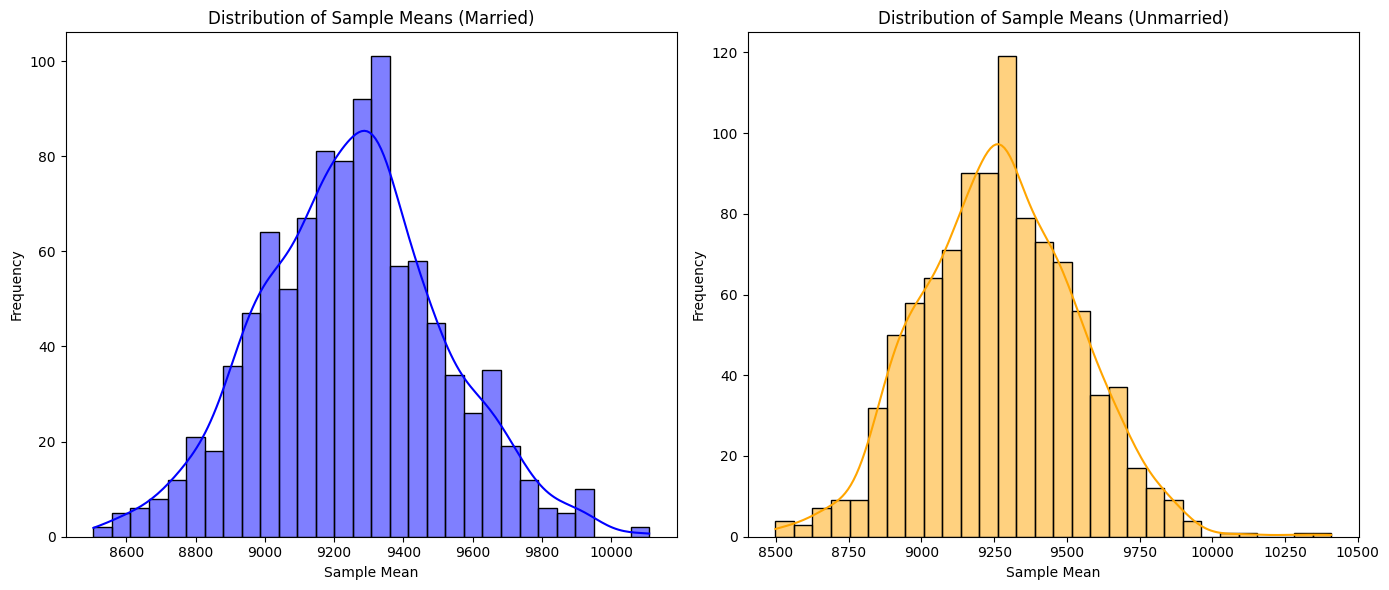

In [ ]:
# Filter data by Maritial Status
Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]

sample_size = 350  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for Married customers
married_sample_means = [np.mean(np.random.choice(Married_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]

# Random sampling for Unmarried customers
unmarried_sample_means = [np.mean(np.random.choice(Unmarried_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]



# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for Married customers
plt.subplot(1, 2, 1)
sns.histplot(married_sample_means, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Married)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for Unmarried customers
plt.subplot(1, 2, 2)
sns.histplot(unmarried_sample_means, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Unmarried)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### for Sample size 500 and number of samples 700

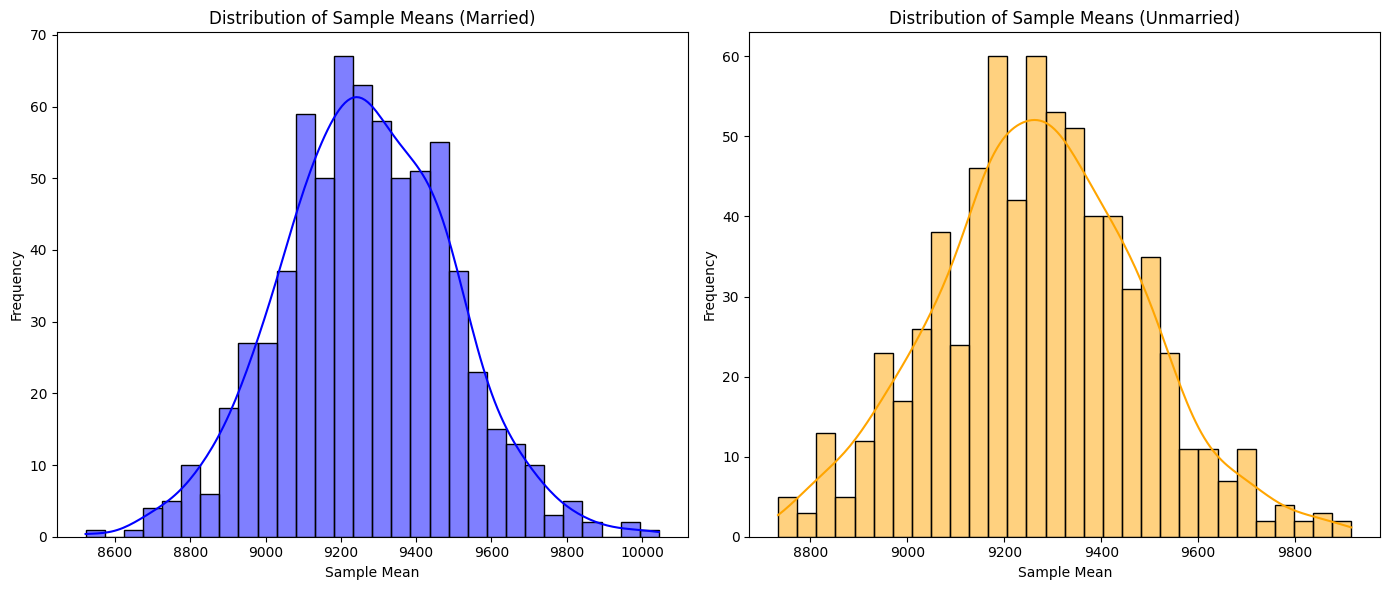

In [ ]:
# Filter data by Maritial Status
Married_data = df[df["Marital_Status"]==1]
Unmarried_data = df[df["Marital_Status"]==0]

sample_size = 500  # Size of each sample
num_samples = 700  # Number of samples to draw

# Random sampling for Married customers
married_sample_means = [np.mean(np.random.choice(Married_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]

# Random sampling for Unmarried customers
unmarried_sample_means = [np.mean(np.random.choice(Unmarried_data["Purchase"],size = sample_size,replace=False)) for _ in range(num_samples)]



# Plotting
plt.figure(figsize=(14, 6))

# Plot the distribution of sample means for Married customers
plt.subplot(1, 2, 1)
sns.histplot(married_sample_means, bins=30, kde=True, color="blue")
plt.title("Distribution of Sample Means (Married)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Plot the distribution of sample means for Unmarried customers
plt.subplot(1, 2, 2)
sns.histplot(unmarried_sample_means, bins=30, kde=True, color="orange")
plt.title("Distribution of Sample Means (Unmarried)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### To make this more justified lets perform hypothesis test to determine if there is a significant difference between the average spending of the two groups of Marital Status.
###we will use two-sample t-test (also known as the independent t-test).

Setting the Hypothesis:

**Null Hypothesis (H₀):** There is no significant difference in the average spending between Married and Unmarried customers. (mu1 = mu2)

**Alternative Hypothesis (H₁):** There is a significant difference in the average spending between Married and Unmarried customers. (mu1 ≠ mu2)

In [ ]:
from scipy import stats

# Filter data by Maritial Status
Unmarried = df[df["Marital_Status"]==0]
Married = df[df["Marital_Status"]==1]

# Take random sample for Unmarried purchase
Unmarried_data = np.random.choice(Unmarried["Purchase"],size = 500)
mean_Unmarried_data = np.mean(Unmarried_data)

# Take random sample for Married purchase
Married_data = np.random.choice(Married["Purchase"],size = 500)
mean_Married_data = np.mean(Married_data)

#Compute Statistic and P value
t_statistic, p_value = stats.ttest_ind(Unmarried_data, Married_data,equal_var=False)


print(f"Mean Spending (Unmarried): {mean_Unmarried_data:.2f}")
print(f"Mean Spending (Married): {mean_Married_data:.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"p-Value: {p_value:.4f}")

# Lets assume 99% Confidence interval
alpha = 0.01
if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Conclusion: There is a significant difference in the average spending between Married and Unmarried customers.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in the average spending between Married and Unmarried customers.")

Mean Spending (Unmarried): 9578.38
Mean Spending (Married): 9374.79
t-Statistic: 0.63
p-Value: 0.5273
Result: Fail to reject the null hypothesis.
Conclusion: There is no significant difference in the average spending between Married and Unmarried customers.


**For testing 4 diffrent sample size we have conclusion that:**

1. Central Limit Theorem Validation:

- **Normal Distribution:** The Sample means are normally distributed reinforces the Central Limit Theorem (CLT). The CLT states that the distribution of sample means will approach a normal distribution as the sample size increases, regardless of the shape of the population distribution, provided the sample size is sufficiently large.
- The central point of each normal distribution (the peak) represents the average spending for each Marital Status. By comparing the means of these distributions, you can infer the relative spending behavior of Unmarried versus Married customers.

2. Recommendations:
- From above graph we can design marketing campaigns.For example,

 *   The mean spending for unmarried customers is slightly higher, consider focusing on products related to young and single individuals.

 *   The mean spending for married customers is slightly lower so you might explore strategies to increase average spending of this group with strategies like discounts,offers on couple/family oriented products etc.

 * for married customers focus on cross-selling products that might be used together.

 * for unmarried customers focus on cross-selling products that might be compliment their existing product.

 *   Plan promotions around events or holidays that might make diffrence between unmarried vs. married customers. For example, special offers for Valentine's Day might appeal more to unmarried customers, while family-oriented holidays might be more relevant for married customers.

## Q: Conclude the results and check if the confidence intervals of average Unmarried and Married spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

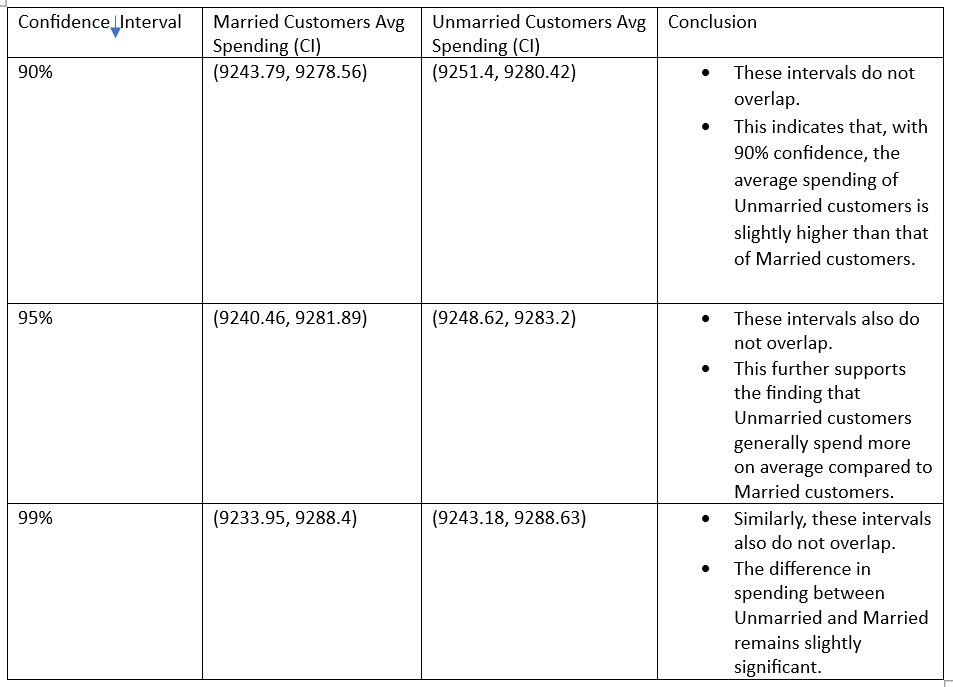

1.   **Conclusion:**
   *  The above table indicates that,the confidence intervals for the average spending of Unmarried and Married customers do not overlap at any confidence level i.e (99%, 95%, and 90%).
   
  *   This consistent non-overlap indicates that there is a difference in average spending between Unmarried and Married customers. Unmarried spend slightly more on average than Married.


2.   **Recommendations:**
  *   Categorise products for diffrent marital status like products which single or unmarried customers tends to buy more and give them discounts,offers etc.
    *  Have a same approach for married customers as well.

  *    Create  advertising campaigns focusing on products and promotions that align with the spending habits of each group married and unmarried.
  *   Use various channels (social media, email, in-store) to deliver personalized messages like notifications.
  *   Use customer feedback to continuously improve the shopping experience and resolve the gaps.
  *   Optimize the e-commerce platform for a better user experience, including personalized product recommendations and promotions.

  *   Run marketing strategies to local preferences and cultural differences for diffrent regions.
  *   Conduct A/B testing for different marketing strategies, promotions, and product placements to identify the most effective approaches for marital status.




-----------------------------------------------------------------------------------------------------

# Age Group VS Purchase

In [ ]:
# Retrive Columns
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
# Get average purchase Age group wise
round(df.groupby("Age")["Purchase"].mean(),2)

,Purchase
Age,
0-17,8933.46
18-25,9169.66
26-35,9252.69
36-45,9331.35
46-50,9208.63
51-55,9534.81
55+,9336.28


In [ ]:
# Get statistical data Age group wise

df.groupby("Age")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


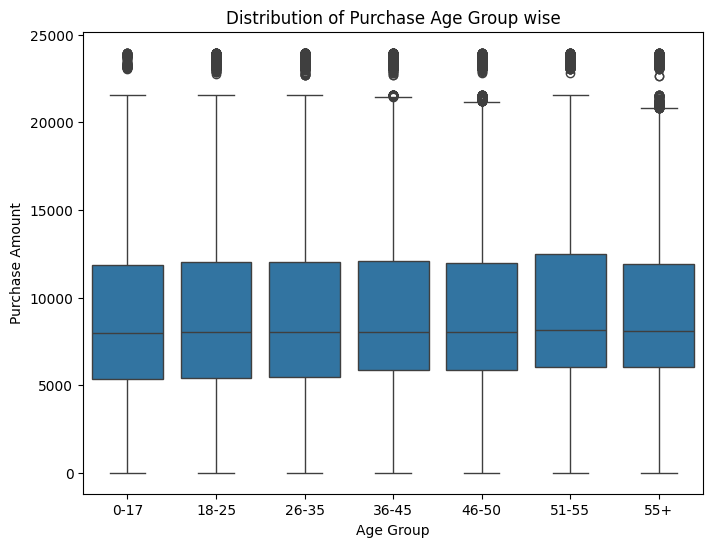

In [ ]:
# Plot a Boxplot for Age group wise purchase
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

plt.figure(figsize =(8,6))
sns.boxplot(x = df["Age"],y= df["Purchase"],order=age_order)
plt.title("Distribution of Purchase Age Group wise")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.show()




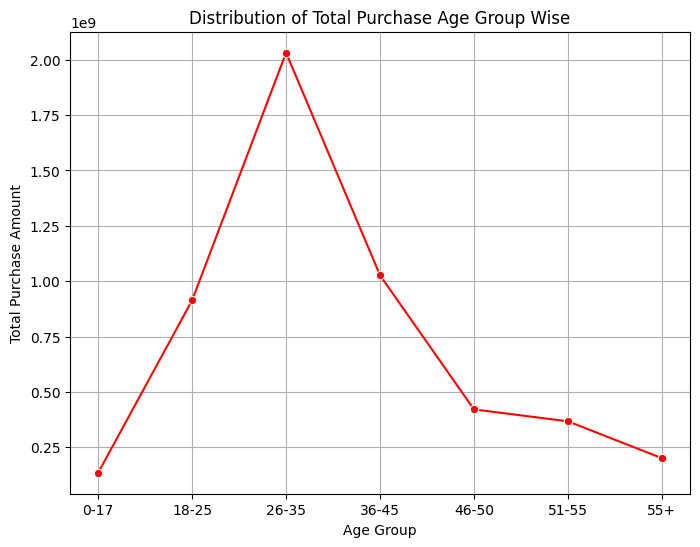

In [ ]:
# Plot a graph for Total amount spend by each age group

data = df.groupby("Age")["Purchase"].sum()
sorted_data= data.sort_index()


plt.figure(figsize=(8, 6))
sns.lineplot(x =sorted_data.index,y=sorted_data.values,marker='o', color='red' )
plt.title("Distribution of Total Purchase Age Group Wise")
plt.xlabel("Age Group")
plt.ylabel("Total Purchase Amount")
plt.grid(True)
plt.show()

### Average Spending for each age group

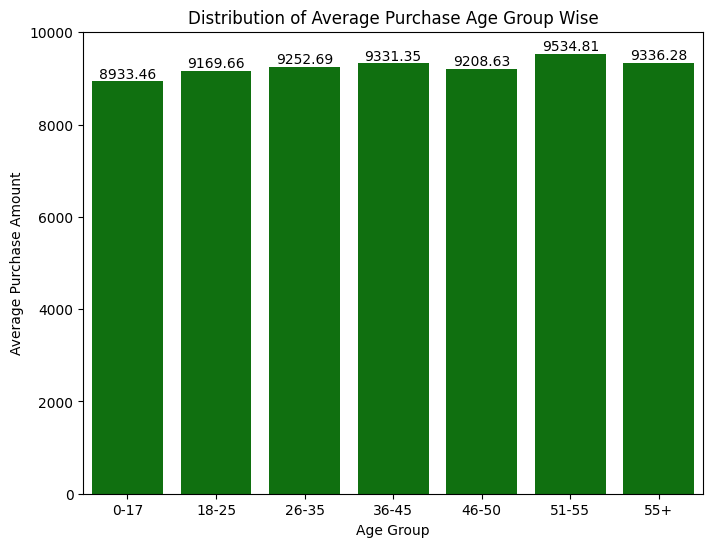

In [ ]:
# Plot a graph for Average amount spend by each age group

data = df.groupby("Age")["Purchase"].mean()
sorted_data= data.sort_index()


plt.figure(figsize=(8, 6))

ax = sns.barplot(x =sorted_data.index,y=sorted_data.values,color= "green")
for val in ax.containers:
  ax.bar_label(val)

plt.title("Distribution of Average Purchase Age Group Wise")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.show()

1.   **Inference:**
 *   There no such significant diffrence in spending with diffrent age group.
 * There is a general upward trend in average purchase amounts as age increases, suggesting that older age groups spend more on purchases on average.
 *   The highest average spending is observed in the **51-55** age group **(9534.81)**, followed closely by the **55+** age group **(9336.28)**. This suggests that older customers tend to spend more per transaction.
 *   The **0-17** age group has the lowest average spending per transaction **(8933.46)**, which is lower than most other age groups.
 *   There is a general trend of increasing average spending with age, peaking in the 51-55 age group. This indicates that as customers age, their average spending per transaction increases.




2.   **Recommendations:**
 *   Since age group 51-55 and 55+ spends more, Implement or enhance loyalty programs targeting the 51-55 and 55+ age groups, who have the highest average purchase amounts. Offering exclusive rewards or benefits to these customers could increase repeat purchases and brand loyalty.
 *   Since 0-17 and 18-25 age groups spends less as compare to others,Offer special promotions, discounts to the 0-17 and 18-25 age groups to boost their spending.
 * For the 26-35 and 36-45 age groups offer both value and premium products.
 *   Improve the overall shopping experience for all age groups like customer support, Enhancing Online applications user experience also physical store experiences etc.
 *   Analyse what rival companies offering to the customers and try to offer the same with best quality.








### Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
With 90% Confidence Interval

In [ ]:
# Group the data by Age and Purchase
data = df.groupby("Age")["Purchase"]

# Calculate sample statistics

avg = data.mean()
std = data.std()
n = data.count()

# 90% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.90):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

ci = confidence_interval(avg, std, n)

# Merge into single DataFrame
a = pd.DataFrame(ci[0])
b = pd.DataFrame(ci[1])

merge = pd.merge(a, b, on='Age')

print("Average amount spent per transaction by each group customers:\n",round(avg,2))
print("-"*70)
print("90% Confidence Interval for each group customers:\n", merge)





Average amount spent per transaction by each group customers:
 Age
0-17     8933.46
18-25    9169.66
26-35    9252.69
36-45    9331.35
46-50    9208.63
51-55    9534.81
55+      9336.28
Name: Purchase, dtype: float64
----------------------------------------------------------------------
90% Confidence Interval for each group customers:
        Purchase_x  Purchase_y
Age                          
0-17      8865.05     9001.88
18-25     9143.43     9195.89
26-35     9235.10     9270.28
36-45     9306.44     9356.26
46-50     9170.41     9246.84
51-55     9492.16     9577.45
55+       9280.07     9392.49


With 95% Confidence Interval

In [ ]:
# Group the data by Age and Purchase
data = df.groupby("Age")["Purchase"]

# Calculate sample statistics

avg = data.mean()
std = data.std()
n = data.count()

# 95% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.95):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

ci = confidence_interval(avg, std, n)

# Merge into single DataFrame
a = pd.DataFrame(ci[0])
b = pd.DataFrame(ci[1])

merge = pd.merge(a, b, on='Age')

print("Average amount spent per transaction by each group customers:\n",round(avg,2))
print("-"*70)
print("95% Confidence Interval for each group customers:\n", merge)

Average amount spent per transaction by each group customers:
 Age
0-17     8933.46
18-25    9169.66
26-35    9252.69
36-45    9331.35
46-50    9208.63
51-55    9534.81
55+      9336.28
Name: Purchase, dtype: float64
----------------------------------------------------------------------
95% Confidence Interval for each group customers:
        Purchase_x  Purchase_y
Age                          
0-17      8851.95     9014.98
18-25     9138.41     9200.92
26-35     9231.73     9273.65
36-45     9301.67     9361.03
46-50     9163.09     9254.17
51-55     9483.99     9585.62
55+       9269.30     9403.26


With 99% Confidence Interval

In [ ]:
# Group the data by Age and Purchase
data = df.groupby("Age")["Purchase"]

# Calculate sample statistics

avg = data.mean()
std = data.std()
n = data.count()

# 99% confidence interval function

def confidence_interval(samp_mean,std_dev,size,confidence = 0.99):
  z = stats.norm.ppf(1 - (1 - confidence) / 2)
  c1 = samp_mean - (z *(std_dev/np.sqrt(size)))
  c2 = samp_mean + (z *(std_dev/np.sqrt(size)))
  return round(c1,2),round(c2,2)

ci = confidence_interval(avg, std, n)

# Merge into single DataFrame
a = pd.DataFrame(ci[0])
b = pd.DataFrame(ci[1])

merge = pd.merge(a, b, on='Age')

print("Average amount spent per transaction by each group customers:\n",round(avg,2))
print("-"*70)
print("99% Confidence Interval for each group customers:\n", merge)

Average amount spent per transaction by each group customers:
 Age
0-17     8933.46
18-25    9169.66
26-35    9252.69
36-45    9331.35
46-50    9208.63
51-55    9534.81
55+      9336.28
Name: Purchase, dtype: float64
----------------------------------------------------------------------
99% Confidence Interval for each group customers:
        Purchase_x  Purchase_y
Age                          
0-17      8826.33     9040.60
18-25     9128.59     9210.74
26-35     9225.15     9280.23
36-45     9292.34     9370.36
46-50     9148.78     9268.48
51-55     9468.02     9601.59
55+       9248.25     9424.31


# Inferences


1.   Average Spending Difference:

 - The average spending for diffrent age group increases with the increase in the age group.
2.   Confidence Intervals:

 - The 99%,95%,90% Confidence Intervals lies between average spending for respective age group.
- This means we are 99%,95% and 90% confident that the true average amount spent per transaction by diffrent age group customers falls within this range.


3. Recommendations:

 - For Younger Age Groups (0-17 and 18-25): Develop marketing strategies that appeal to these demographics, potentially focusing on affordability or value for money. Consider promotions, discounts, or bundled offers that can attract younger customers who might be more price-sensitive.
 - For Older Age Groups (26-35 and 36-45): Create campaigns highlighting premium or high-value products, as this group shows an increasing trend in spending power. Tailoring product recommendations and marketing messages to this age group's preferences could drive higher sales.
 - Implement or enhance loyalty programs targeting the 51-55 and 55+ age groups, who have the highest average purchase amounts. Offering exclusive rewards or benefits to these customers could increase repeat purchases and brand loyalty.
 - For the 51-55 and 55+ Age Groups: Focus on high-quality, premium products or services that align with their demonstrated purchasing tendencies.
 - Use data-driven insights to personalize marketing efforts. For example, if the data shows specific products or categories that are popular among older age groups, tailor your marketing messages to highlight these products to similar demographics.
 - Plan promotions and special events around key shopping periods that align with the purchasing behaviors of different age groups. For example, older age groups might respond well to special events or discounts during key times of the year.

##  explain how the distribution of sample means for diffrent age group customers' purchase amounts is visualized. What can you infer from the histograms about the average spending behavior of these age group customers?

for Sample size 50 and number of samples 1000

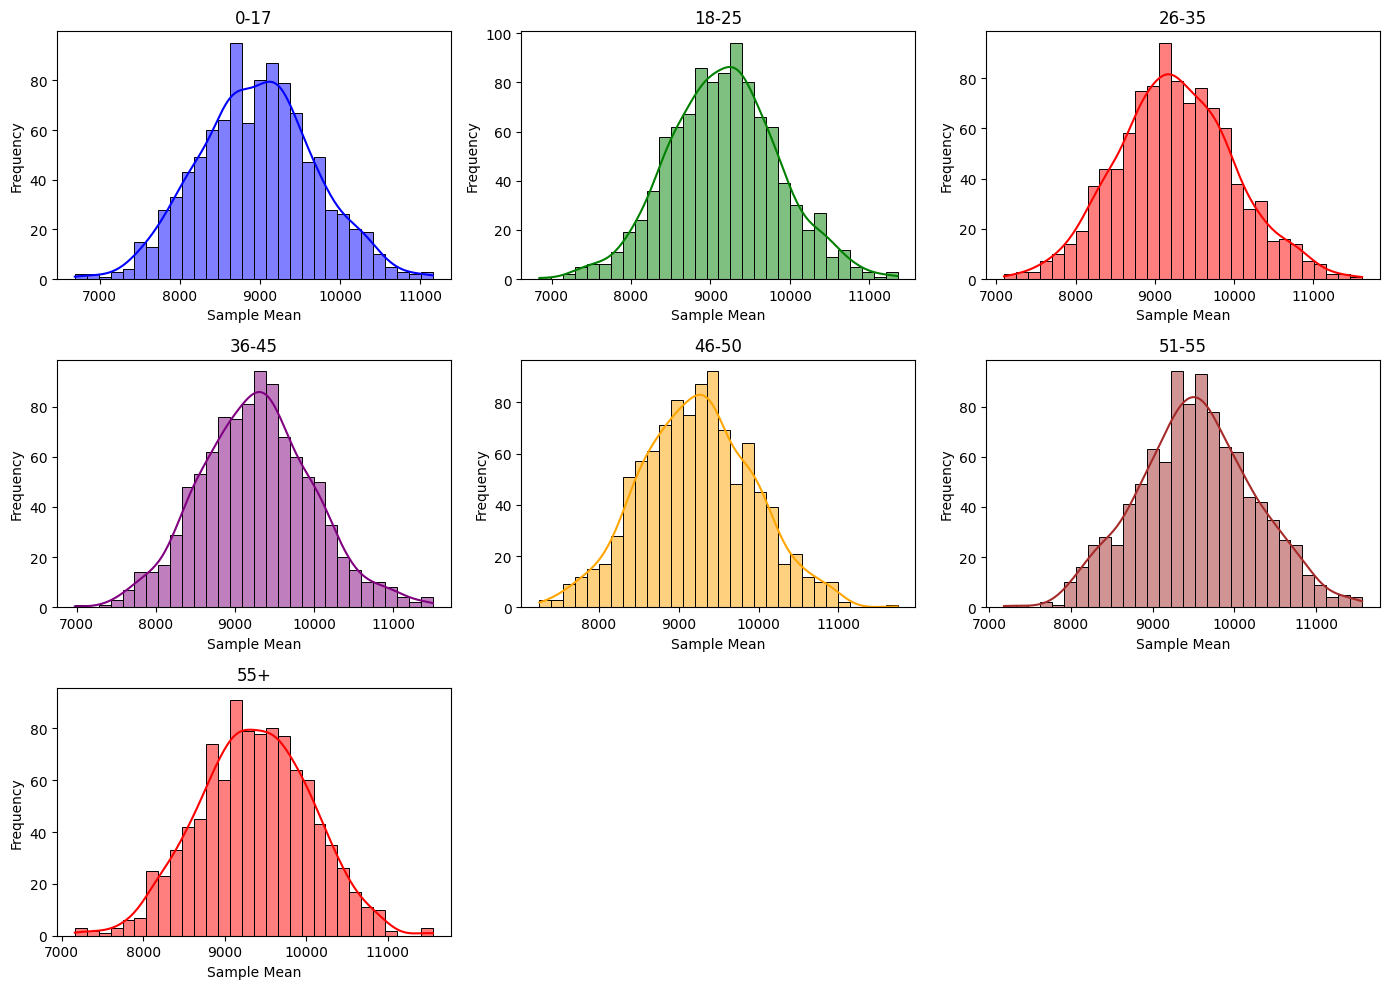

In [ ]:
# Filter data by gender
Age_0_17 = df[df["Age"] == "0-17"]
Age_18_25 = df[df["Age"] == "18-25"]
Age_26_35 = df[df["Age"] == "26-35"]
Age_36_45 = df[df["Age"] == "36-45"]
Age_46_50 = df[df["Age"] == "46-50"]
Age_51_55 = df[df["Age"] == "51-55"]
Age_55_plus = df[df["Age"] == "55+"]





sample_size = 50  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for Age_0_17 customers
sample_means_Age_0_17 = [np.mean(np.random.choice(Age_0_17["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_18_25 customers
sample_means_Age_18_25 = [np.mean(np.random.choice(Age_18_25["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_26_35 customers
sample_means_Age_26_35 = [np.mean(np.random.choice(Age_26_35["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_36_45 customers
sample_means_Age_36_45 = [np.mean(np.random.choice(Age_36_45["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_46_50 customers
sample_means_Age_46_50 = [np.mean(np.random.choice(Age_46_50["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_51_55 customers
sample_means_Age_51_55 = [np.mean(np.random.choice(Age_51_55["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_55_plus customers
sample_means_Age_55_plus = [np.mean(np.random.choice(Age_55_plus["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Plotting

plt.figure(figsize=(14, 10))

# Plot the distribution of sample means for each age group
plt.subplot(3, 3, 1)
sns.histplot(sample_means_Age_0_17, bins=30, kde=True, color="blue")
plt.title("0-17")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 2)
sns.histplot(sample_means_Age_18_25, bins=30, kde=True, color="green")
plt.title("18-25")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 3)
sns.histplot(sample_means_Age_26_35, bins=30, kde=True, color="red")
plt.title("26-35")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 4)
sns.histplot(sample_means_Age_36_45, bins=30, kde=True, color="purple")
plt.title("36-45")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 5)
sns.histplot(sample_means_Age_46_50, bins=30, kde=True, color="orange")
plt.title("46-50")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 6)
sns.histplot(sample_means_Age_51_55, bins=30, kde=True, color="brown")
plt.title("51-55")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 7),
sns.histplot(sample_means_Age_55_plus, bins=30, kde=True, color="red")
plt.title("55+")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

for Sample size 100 and number of samples 1000


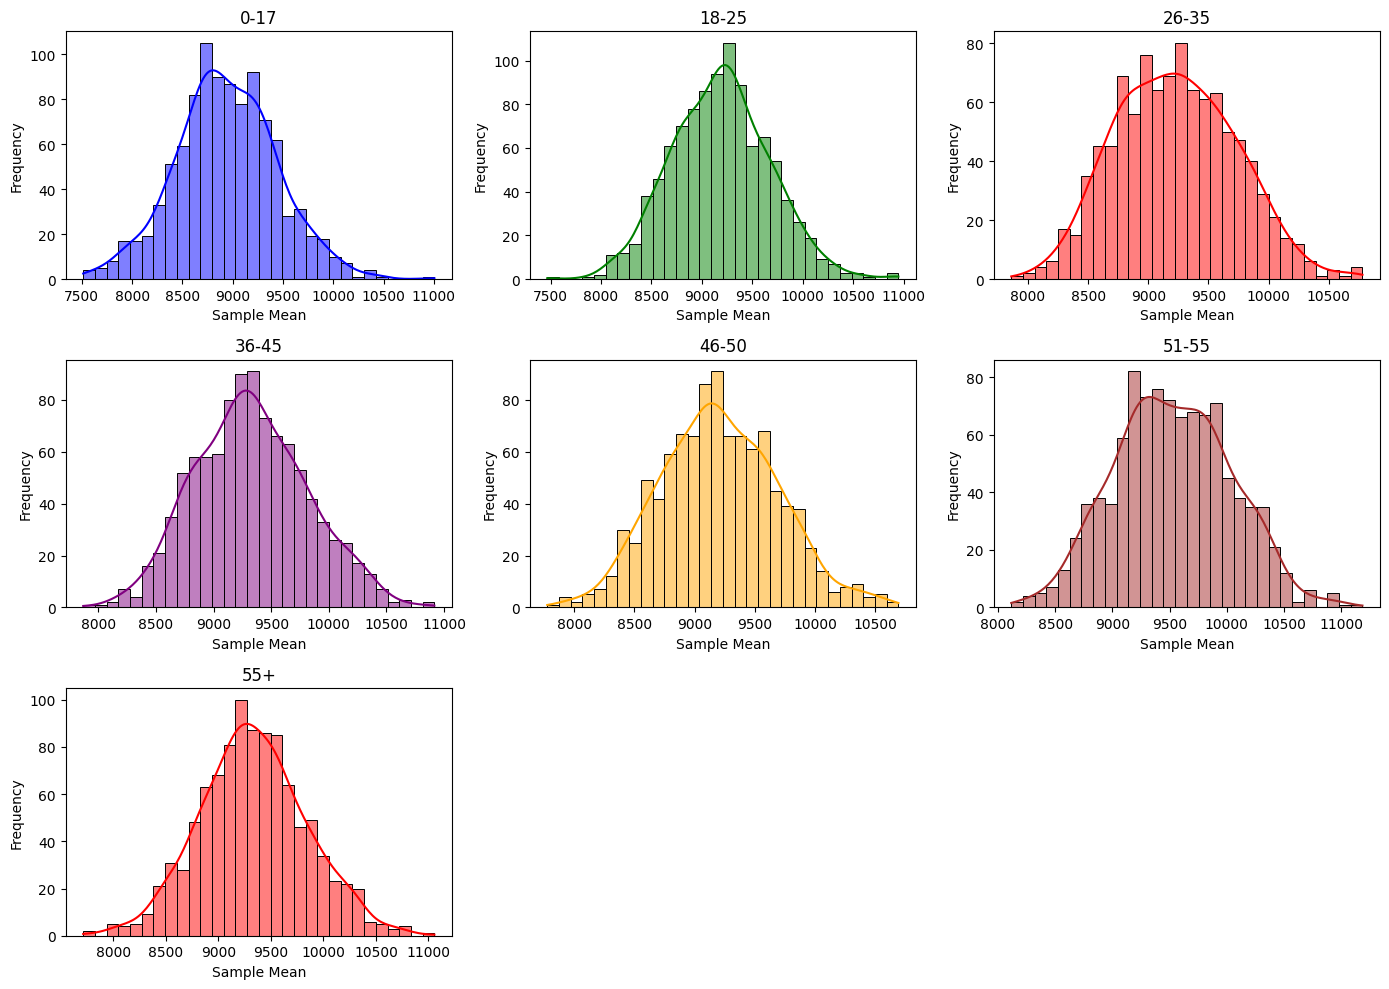

In [ ]:
# Filter data by gender
Age_0_17 = df[df["Age"] == "0-17"]
Age_18_25 = df[df["Age"] == "18-25"]
Age_26_35 = df[df["Age"] == "26-35"]
Age_36_45 = df[df["Age"] == "36-45"]
Age_46_50 = df[df["Age"] == "46-50"]
Age_51_55 = df[df["Age"] == "51-55"]
Age_55_plus = df[df["Age"] == "55+"]





sample_size = 100  # Size of each sample
num_samples = 1000  # Number of samples to draw

# Random sampling for Age_0_17 customers
sample_means_Age_0_17 = [np.mean(np.random.choice(Age_0_17["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_18_25 customers
sample_means_Age_18_25 = [np.mean(np.random.choice(Age_18_25["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_26_35 customers
sample_means_Age_26_35 = [np.mean(np.random.choice(Age_26_35["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_36_45 customers
sample_means_Age_36_45 = [np.mean(np.random.choice(Age_36_45["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_46_50 customers
sample_means_Age_46_50 = [np.mean(np.random.choice(Age_46_50["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_51_55 customers
sample_means_Age_51_55 = [np.mean(np.random.choice(Age_51_55["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Random sampling for Age_55_plus customers
sample_means_Age_55_plus = [np.mean(np.random.choice(Age_55_plus["Purchase"],size =sample_size,replace = False )) for _ in range(num_samples)]

# Plotting

plt.figure(figsize=(14, 10))

# Plot the distribution of sample means for each age group
plt.subplot(3, 3, 1)
sns.histplot(sample_means_Age_0_17, bins=30, kde=True, color="blue")
plt.title("0-17")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 2)
sns.histplot(sample_means_Age_18_25, bins=30, kde=True, color="green")
plt.title("18-25")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 3)
sns.histplot(sample_means_Age_26_35, bins=30, kde=True, color="red")
plt.title("26-35")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 4)
sns.histplot(sample_means_Age_36_45, bins=30, kde=True, color="purple")
plt.title("36-45")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 5)
sns.histplot(sample_means_Age_46_50, bins=30, kde=True, color="orange")
plt.title("46-50")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 6)
sns.histplot(sample_means_Age_51_55, bins=30, kde=True, color="brown")
plt.title("51-55")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(3, 3, 7),
sns.histplot(sample_means_Age_55_plus, bins=30, kde=True, color="red")
plt.title("55+")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# 1. Central Limit Theorem Validation:

 - **Normal Distribution:** The Sample means are normally distributed reinforces the Central Limit Theorem (CLT). The CLT states that the distribution of sample means will approach a normal distribution as the sample size increases, regardless of the shape of the population distribution, provided the sample size is sufficiently large.
 - The normal distribution across age groups suggests that purchasing behavior within each group is relatively stable and predictable. However, the mean purchase amount still varies by age group, indicating different spending patterns.
 - The central point of each normal distribution (the peak) represents the average spending for each Age Group. By comparing the means of these distributions, you can infer the relative spending behavior of diffrent Age Group.

2. Recommendations:
- From above graph we can design marketing campaigns.For example,

 *    Utilize the normal distribution characteristics to develop targeted marketing strategies for each age group.

 *   Given the normal distribution, we can use the mean and standard deviation to forecast inventory needs more accurately

 * Place high-demand products prominently and consider stocking up on items that are popular among age groups with higher average purchases to avoid out of stock scenario.

 * Regularly analyze customer feedback and purchasing data to adjust the strategies.

 *   Plan promotional activities with the seasonal purchasing patterns. For instance, if you know that purchase amounts peak during certain times of the year for specific age groups, plan your marketing campaigns and stock accordingly.

## Q: Conclude the results and check if the confidence intervals of average for diffrent age groups are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

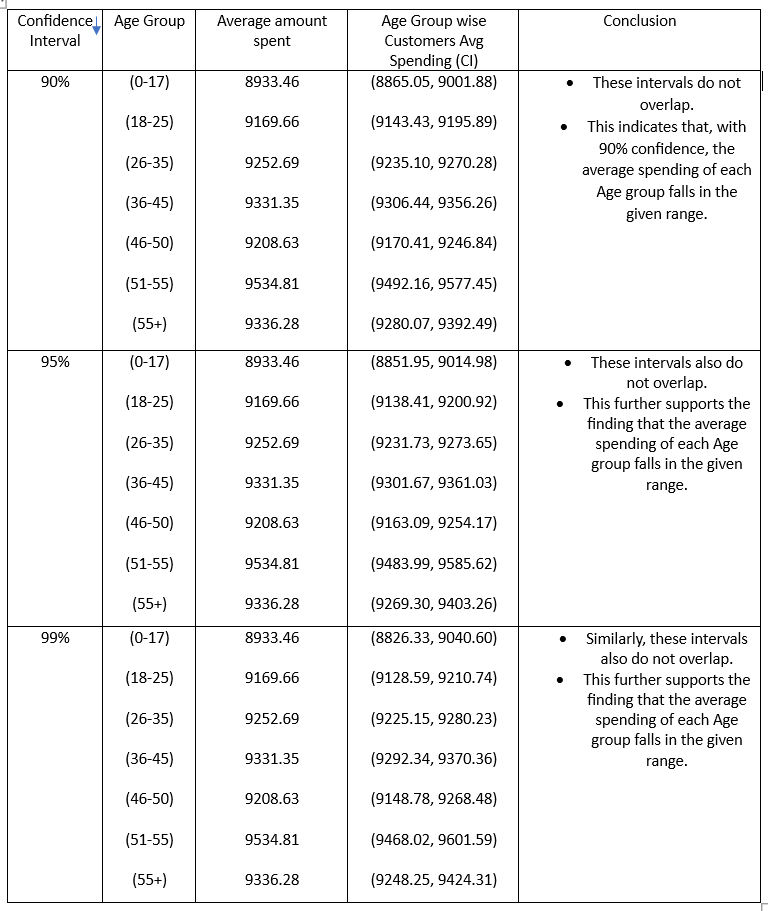

1.   **Conclusion:**
   *  The above table indicates that,the confidence intervals for the average spending of diffrent age group customers do not overlap at any confidence level i.e (99%, 95%, and 90%).
   
  *   This consistent non-overlap indicates that there is a difference in average spending between diffrent age group customers. More the age more they spends.


2.   **Recommendations:**
  *  categorize products and tailor marketing strategies based on age groups and their typical purchasing behaviors.
    *  Create targeted promotions based on the average purchase behavior of each age group. For example, offer a discount on fitness equipment for the 18-25 age group and on luxury items for the 46-50 age group.
  *    Align discounts and special offers with key shopping periods that are significant for each age group, such as back-to-school for younger customers or holiday promotions for older age groups.

  *   Design store layouts and online catalogs that feature products tailored to each age group's interests.
  *   Use customer feedback to continuously improve the shopping experience and resolve the gaps.
  *   Optimize the e-commerce platform for a better user experience, including personalized product recommendations and promotions.
  * Host events or webinars that cater to different age groups, such as tech launch events for younger customers and health and wellness seminars for older customers.

  *   Run marketing strategies to local preferences and cultural differences for diffrent regions.
  *   Conduct A/B testing for different marketing strategies, promotions, and product placements to identify the most effective approaches for diffrent age group.

# Questions

## Q1: Are women spending more money per transaction than men? Why or Why not?
- No, women are not spending more per transaction than men. According to the analysis, male customers have an average transaction amount of 9437.53, while female customers have an average transaction amount of 8734.57. This indicates that male customers spend more per transaction on average compared to female customers.

## Q2: Confidence intervals and distribution of the mean of the expenses by female and male customers.

**Female Customers:**

 - 99% CI: (8701.24, 8767.89)
 - 95% CI: (8709.21, 8759.92)
 - 90% CI: (8713.29, 8755.84)

**Male Customers:**

 - 99% CI: (9417.15, 9457.91)
 - 95% CI: (9422.02, 9453.03)
 - 90% CI: (9424.51, 9450.54)

The confidence intervals for female and male customers do not overlap, indicating a statistically significant difference in average spending between genders.

## Q3: Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

No, the confidence intervals for average spending by male and female customers do not overlap at any confidence level (99%, 95%, and 90%). This consistent non-overlap indicates a significant difference in average spending between the two genders.

Walmart can leverage this conclusion by:

 - Designing targeted marketing campaigns to encourage higher spending among female customers, such as offering discounts on higher-value items or creating loyalty programs.
 - Tailoring promotions and offers to appeal to male customer's tendency to spend more, focusing on premium or high-value products.
 - Optimizing inventory based on gender-specific spending patterns, ensuring that high-value items are well-stocked for male customers and value-for-money products are available for female customers.

## Q4: Who is spending more money per transaction: Married vs Unmarried? Why and Why not?

**Unmarried customers** are spending slightly more per transaction compared to married customers.

The average transaction amount for unmarried customers is 9265.91,

whereas for married customers it is 9261.17.

The small difference suggests that unmarried customers may spend slightly more, but the difference is not that high.

## Q5: Confidence intervals and distribution of the mean of the expenses by Married vs Unmarried customers.

**Married Customers:**

 - 99% CI: (9233.95, 9288.4)
 - 95% CI: (9240.46, 9281.89)
 - 90% CI: (9243.79, 9278.56)

**Unmarried Customers:**

 - 99% CI: (9243.18, 9288.63)
 - 95% CI: (9248.62, 9283.2)
 - 90% CI: (9251.4, 9280.42)

The confidence intervals for married and unmarried customers do not overlap, indicating a slight but statistically significant difference in average spending.

## Q6: Are confidence intervals of average Married vs Unmarried customer spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

The confidence intervals for average spending by married and unmarried customers do not overlap at any confidence level. This suggests a slight but significant difference in spending behavior.

Walmart can leverage this conclusion by:

 - Creating targeted marketing strategies for unmarried customers, highlighting products that appeal to them or offering promotions tailored to their spending habits.
 - Developing family-oriented promotions or discounts for married customers to address their slightly lower average spending.
 - Analyzing customer preferences through surveys,feedback to refine marketing strategies and product offerings.

## Q7: Which age group is spending more money per transaction? Why and Why not?

The **51-55 age group** is spending the most per transaction, with an average spending of 9534.81. This is followed by the **55+ age group** with an average of 9336.28. The older age groups spend more per transaction.


Reasons might be :

 - Older customers might have more income and higher purchasing power compared to younger age groups.
 - These age groups may also have different spending priorities and preferences, leading to higher average transaction amounts.


## Q8: Confidence intervals and distribution of the mean of the expenses by each age group customers.

- Average spending increases with age, peaking in the 51-55 age group and remaining high for the 55+ age group.
- The lowest average spending is in the 0-17 age group.


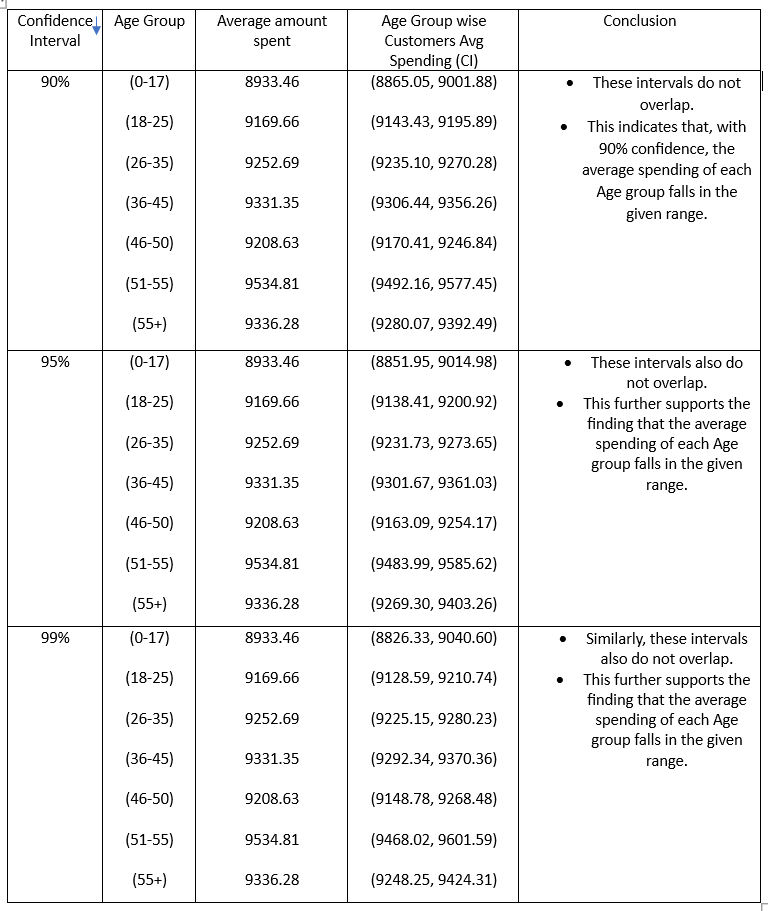

## Q9: Are confidence intervals of average spending for different age groups overlapping? How can Walmart leverage this conclusion to make changes or improvements?

The confidence intervals for average spending across different age groups do not overlap, indicating statistically significant differences in spending behavior among the age groups.

Walmart can leverage this conclusion by:

 - Implementing or enhancing loyalty programs targeted at older age groups, who have higher average spending.
 - Offering special promotions or discounts to younger age groups (0-17 and 18-25) to increase their average transaction amounts.
 - Tailoring marketing strategies and product offerings based on the spending behavior of each age group.
 - Planning promotions and stock levels according to the purchasing tendencies of each age group, ensuring that high-demand products are available and prominently displayed.

## **Final Insights:**



1.   **Gender Spending Patterns:**
 - Men spend more per transaction than women. Men's average spending is higher across all confidence levels, and the confidence intervals do not overlap, confirming a significant difference.
 - Men generally have a higher transaction amount, suggesting that Walmart could focus on premium products and high-value promotions for men.
Marital Status Spending Patterns:

2.   **Marital Status Spending Patterns:**
 - Unmarried customers spend slightly more than married customers, but the difference is minor.
 - The spending difference is subtle, so tailored promotions that appeal to single individuals might be beneficial, but similar strategies could also work for married individuals.

3.   **Age Group Spending Patterns:**
 - Older age groups, particularly those aged 51-55 and 55+, spend the most per transaction. and, the youngest age group (0-17) spends the least.
 - Older customers tend to have more purchasing power. Tailoring high-value and premium product offerings for older age groups while providing value-for-money options for younger customers can help optimize sales.













## **Distribution:**



1. **Gender:**
 - There is a clear separation in spending between genders, with men spending more than women. This distinction is statistically significant, indicating a robust pattern in spending behavior.
2. **Marital Status:**
 - The spending difference between married and unmarried customers is small but notable. It suggests that marital status has some influence on spending but less so than gender or age.


3. **Age Group:**
 - Spending increases with age, peaking in older age groups.
 - This trend indicates that age has a significant impact on spending behavior.









## **Recommendations:**

1. **For Women:**

 - **Offer Discounts:** Provide targeted discounts on higher-value items to encourage more spending.
 - **Create Loyalty Programs:** Develop programs that reward frequent purchases or higher spenders.
 - **Promote Value-for-Money Products:** Highlight items that offer great value and appeal to women shoppers.

2. **For Men:**

 - **Promote Premium Products:** Focus on high-value and premium product promotions.
 - **Exclusive Offers:** Create exclusive deals or offers that cater to higher spenders.

3. **For Unmarried Customers:**

 - **Targeted Promotions:** Offer promotions or discounts on products that are relevant to single individuals.
 - **Personalized Marketing:** Use data to tailor marketing messages to interests commonly associated with unmarried customers.

4. **For Married Customers:**

 - **Family-Oriented Offers:** Provide discounts or promotions on family-related or home products.

5. **For Younger Age Groups (0-17 and 18-25):**

 - **Special Promotions:** Run promotions that get attraction of younger customers, such as discounts on popular trends or essential items.

5. **For Older Age Groups (26-45 and 51-55, 55+):**

 - **High-Value Offers:** Create special offers for premium and high-quality products.
 - **Loyalty Rewards:** Enhance loyalty programs with exclusive rewards to retain high-spending older customers.

6. **Storage Improvements:**

 - **Optimize Inventory:** Stock more high-value items for men and ensure that value-for-money options are plentiful for women.
 - **Enhance User Experience:** Improve both online and physical store experiences to cater to the preferences of different age groups.
 - **Seasonal Promotions:** Plan promotions around key shopping periods and tailor them to the spending habits of different Locations.
 - **Leverage Data:**Use insights from spending patterns to create targeted marketing campaigns that resonate with different customer segments.


